In [1]:
import h5py as h5  #importing, make sure the kernel is correct or the module will be unknown
import pandas as pd
from astropy.table import Table
from astropy import units as u
from astropy import constants as const
import numpy as np
import matplotlib.pyplot as plt
# usually the recommended one that is part of the cluster

### Reading in the HDF5 File and making a pandas dataframe

In [2]:
# reading in the HDF5 file
pathToSM_H5 = '/mnt/home/msantiago/ceph/data/COMPAS_Output_LowMass_1.h5' #path of the hdf5 file

Data_2 = h5.File(pathToSM_H5)

In [3]:
# we want to read in the bse_system_paramtetrs to get information about thes different systems
SYS = pd.DataFrame() # making a pandas dataframe

for key in Data_2["BSE_System_Parameters"].keys(): #looping through the "keys" or paramters in BSE_System_Parameters

    SYS[key] = Data_2["BSE_System_Parameters"][key][()] # adding these columns to the dataframe

In [4]:
# let's look at this dataframe
pd.set_option('display.max_columns', None) # allows us to see all of the columns
display(SYS)

,Applied_Kick_Magnitude(1),Applied_Kick_Magnitude(2),CE_Alpha,CE_Event_Counter,CH_on_MS(1),CH_on_MS(2),Drawn_Kick_Magnitude(1),Drawn_Kick_Magnitude(2),Eccentricity,Eccentricity@ZAMS,Equilibrated_At_Birth,Error,Evolution_Status,Immediate_RLOF>CE,LBV_Factor,Mass(1),Mass(2),Mass@ZAMS(1),Mass@ZAMS(2),Merger,Merger_At_Birth,Metallicity@ZAMS(1),Metallicity@ZAMS(2),Omega@ZAMS(1),Omega@ZAMS(2),Optimistic_CE,Record_Type,SEED,SN_Kick_Magnitude_Random_Number(1),SN_Kick_Magnitude_Random_Number(2),SN_Kick_Mean_Anomaly(1),SN_Kick_Mean_Anomaly(2),SN_Kick_Phi(1),SN_Kick_Phi(2),SN_Kick_Theta(1),SN_Kick_Theta(2),SemiMajorAxis,SemiMajorAxis@ZAMS,Sigma_Kick_CCSN_BH,Sigma_Kick_CCSN_NS,Sigma_Kick_ECSN,Sigma_Kick_USSN,Stellar_Type(1),Stellar_Type(2),Stellar_Type@ZAMS(1),Stellar_Type@ZAMS(2),SystemicSpeed,Time,Unbound,WR_Factor
0,0.0,0.0,1.0,0,0,0,0.0,0.0,0.0,0.0,0,0,3,0,1.5,0.672887,0.545816,1.328400,0.882688,0,0,0.004488,0.004488,0.0,0.0,0,1,900000,0.154341,0.693482,0.971230,2.679066,0.111924,-0.531418,1.828170,0.741267,13855.371248,35.495599,265.0,265.0,30.0,30.0,11,11,1,1,0.0,13806.051158,0,1.0
1,0.0,0.0,1.0,0,0,0,0.0,0.0,0.0,0.0,0,0,3,0,1.5,0.637262,0.518886,2.022025,1.064154,0,0,0.027780,0.027780,0.0,0.0,0,1,900001,0.954802,0.942543,1.059293,0.358406,0.541832,0.988822,5.028769,5.274912,69211.395904,120.154409,265.0,265.0,30.0,30.0,11,11,1,1,0.0,13993.620075,0,1.0
2,0.0,0.0,1.0,0,0,0,0.0,0.0,0.0,0.0,0,0,3,0,1.5,0.631982,0.607620,1.536448,1.398097,0,0,0.008525,0.008525,0.0,0.0,0,1,900002,0.345487,0.441014,5.374213,4.612628,0.656169,0.007463,5.958445,6.225057,81861.122032,160.402708,265.0,265.0,30.0,30.0,11,11,1,1,0.0,13715.419212,0,1.0
3,0.0,0.0,1.0,0,0,0,0.0,0.0,0.0,0.0,0,0,3,0,1.5,0.461183,0.565962,0.971769,0.565960,0,0,0.001600,0.001600,0.0,0.0,0,1,900003,0.880805,0.104775,5.662423,2.485526,-1.023036,0.126661,2.104731,1.057004,344.506740,1.211484,265.0,265.0,30.0,30.0,10,0,1,0,0.0,13781.470737,0,1.0
4,0.0,0.0,1.0,0,0,0,0.0,0.0,0.0,0.0,0,0,3,0,1.5,0.792319,0.608075,2.525490,1.456961,0,0,0.010712,0.010712,0.0,0.0,0,1,900004,0.173404,0.423496,0.056713,4.415918,0.729774,-0.968826,4.465643,1.190569,81316.119336,132.456239,265.0,265.0,30.0,30.0,11,11,1,1,0.0,13957.081171,0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
999995,0.0,0.0,1.0,1,0,0,0.0,0.0,0.0,0.0,0,0,12,1,1.5,0.398600,0.374266,2.860157,0.374266,1,0,0.010599,0.010599,0.0,0.0,1,1,824995,0.726851,0.333662,6.259857,3.600995,0.801323,0.898487,3.628860,5.406509,0.085892,0.087381,265.0,265.0,30.0,30.0,2,0,1,0,0.0,399.038445,0,1.0
999996,0.0,0.0,1.0,1,0,0,0.0,0.0,0.0,0.0,0,0,12,1,1.5,0.209383,0.718716,1.924002,1.185687,1,0,0.004428,0.004428,0.0,0.0,0,1,824996,0.934903,0.788818,0.612357,4.504902,0.115240,0.069594,2.562311,2.610023,0.039854,0.029845,265.0,265.0,30.0,30.0,10,8,1,1,0.0,1394.226016,0,1.0
999997,0.0,0.0,1.0,1,0,0,0.0,0.0,0.0,0.0,0,0,12,1,1.5,3.808858,0.925453,3.809498,0.925453,1,0,0.002886,0.002886,0.0,0.0,0,1,824997,0.104666,0.323782,3.604103,0.014812,-0.210120,-0.206951,4.743650,4.222799,8.312955,0.038654,265.0,265.0,30.0,30.0,1,1,1,1,0.0,166.135617,0,1.0
999998,0.0,0.0,1.0,0,0,0,0.0,0.0,0.0,0.0,0,0,3,0,1.5,0.152270,0.539524,0.912679,0.510091,0,0,0.000372,0.000372,0.0,0.0,0,1,824998,0.538109,0.145337,2.283687,3.237885,-0.467577,-0.337509,5.330613,2.683417,24.268960,0.027979,265.0,265.0,30.0,30.0,10,0,1,0,0.0,13921.584027,0,1.0


### Looking at the Stellar Type distribution

Text(0.5, 0, 'Stellar Type of Star 1')

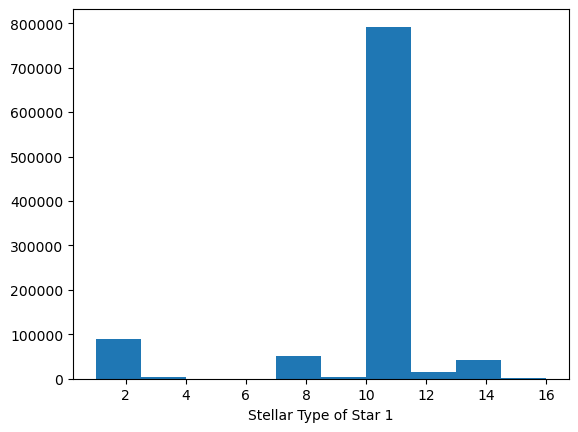

In [5]:
# let's look and see the range of stellar types

plt.hist(SYS["Stellar_Type(1)"])
plt.xlabel("Stellar Type of Star 1")

Text(0.5, 0, 'Stellar Type of Star 2')

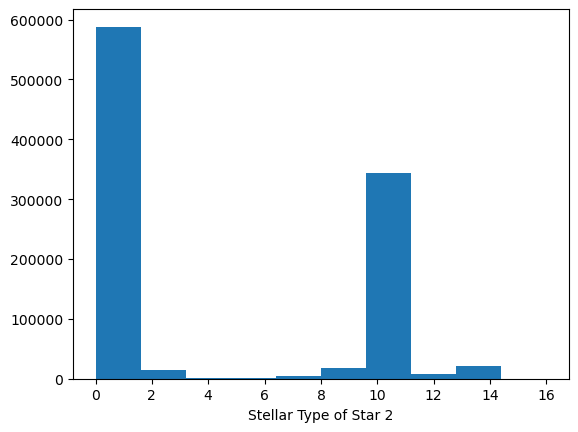

In [6]:
plt.hist(SYS['Stellar_Type(2)'])
plt.xlabel("Stellar Type of Star 2")

#### Let's make a function that when returned gives us information about the different combinations of WD binaries

In [7]:
def WD_BINARY_BOOLS(dataframe):

# let's first look at if there are only helium white dwarf WD binaries
    HeWD_bool = np.logical_and(dataframe['Stellar_Type(1)']==10,dataframe['Stellar_Type(2)']==10)
# then carbon oxygen WD
    COWD_bool = np.logical_and(dataframe['Stellar_Type(1)']==11,dataframe['Stellar_Type(2)']==11)
# then oxgen neon WD
    ONeWD_bool = np.logical_and(dataframe['Stellar_Type(1)']==12,dataframe['Stellar_Type(2)']==12)

# let's look at the combination of WD binaries

# Helium WD combos
    HeCOWD_bool = np.logical_and(dataframe['Stellar_Type(1)']==10,dataframe['Stellar_Type(2)']==11)
    HeONeWD_bool = np.logical_and(dataframe['Stellar_Type(1)']==10,dataframe['Stellar_Type(2)']==12)

# Carbon Oxygen WD combos
    COHeWD_bool = np.logical_and(dataframe['Stellar_Type(1)']==11,dataframe['Stellar_Type(2)']==10)
    COONeWD_bool = np.logical_and(dataframe['Stellar_Type(1)']==11,dataframe['Stellar_Type(2)']==12)

# Oxygen Neon WD combos
    ONeHeWD_bool = np.logical_and(dataframe['Stellar_Type(1)']==12,dataframe['Stellar_Type(2)']==10)
    ONeCOWD_bool = np.logical_and(dataframe['Stellar_Type(1)']==12,dataframe['Stellar_Type(2)']==11)

    # let's return all of these bools
    return(HeWD_bool,COWD_bool,ONeWD_bool,HeCOWD_bool,HeONeWD_bool,COHeWD_bool,COONeWD_bool,ONeHeWD_bool,ONeCOWD_bool)


In [8]:
sum(WD_BINARY_BOOLS(SYS)[0]) # an example of getting the amount of binaries that meet this criteria in a different way than below

23297

In [9]:
# let's now create a dataframe where the above criteria is met based on all of the bools

DOUBLE_WD_SYS = SYS.loc[(WD_BINARY_BOOLS(SYS)[0])|(WD_BINARY_BOOLS(SYS)[1])|(WD_BINARY_BOOLS(SYS)[2])|(WD_BINARY_BOOLS(SYS)[3])|(WD_BINARY_BOOLS(SYS)[4])|(WD_BINARY_BOOLS(SYS)[5])|(WD_BINARY_BOOLS(SYS)[6])|(WD_BINARY_BOOLS(SYS)[7])|(WD_BINARY_BOOLS(SYS)[8])]
DOUBLE_WD_SYS

,Applied_Kick_Magnitude(1),Applied_Kick_Magnitude(2),CE_Alpha,CE_Event_Counter,CH_on_MS(1),CH_on_MS(2),Drawn_Kick_Magnitude(1),Drawn_Kick_Magnitude(2),Eccentricity,Eccentricity@ZAMS,Equilibrated_At_Birth,Error,Evolution_Status,Immediate_RLOF>CE,LBV_Factor,Mass(1),Mass(2),Mass@ZAMS(1),Mass@ZAMS(2),Merger,Merger_At_Birth,Metallicity@ZAMS(1),Metallicity@ZAMS(2),Omega@ZAMS(1),Omega@ZAMS(2),Optimistic_CE,Record_Type,SEED,SN_Kick_Magnitude_Random_Number(1),SN_Kick_Magnitude_Random_Number(2),SN_Kick_Mean_Anomaly(1),SN_Kick_Mean_Anomaly(2),SN_Kick_Phi(1),SN_Kick_Phi(2),SN_Kick_Theta(1),SN_Kick_Theta(2),SemiMajorAxis,SemiMajorAxis@ZAMS,Sigma_Kick_CCSN_BH,Sigma_Kick_CCSN_NS,Sigma_Kick_ECSN,Sigma_Kick_USSN,Stellar_Type(1),Stellar_Type(2),Stellar_Type@ZAMS(1),Stellar_Type@ZAMS(2),SystemicSpeed,Time,Unbound,WR_Factor
0,0.0,0.0,1.0,0,0,0,0.0,0.0,0.0,0.0,0,0,3,0,1.5,0.672887,0.545816,1.328400,0.882688,0,0,0.004488,0.004488,0.0,0.0,0,1,900000,0.154341,0.693482,0.971230,2.679066,0.111924,-0.531418,1.828170,0.741267,13855.371248,35.495599,265.0,265.0,30.0,30.0,11,11,1,1,0.0,13806.051158,0,1.0
1,0.0,0.0,1.0,0,0,0,0.0,0.0,0.0,0.0,0,0,3,0,1.5,0.637262,0.518886,2.022025,1.064154,0,0,0.027780,0.027780,0.0,0.0,0,1,900001,0.954802,0.942543,1.059293,0.358406,0.541832,0.988822,5.028769,5.274912,69211.395904,120.154409,265.0,265.0,30.0,30.0,11,11,1,1,0.0,13993.620075,0,1.0
2,0.0,0.0,1.0,0,0,0,0.0,0.0,0.0,0.0,0,0,3,0,1.5,0.631982,0.607620,1.536448,1.398097,0,0,0.008525,0.008525,0.0,0.0,0,1,900002,0.345487,0.441014,5.374213,4.612628,0.656169,0.007463,5.958445,6.225057,81861.122032,160.402708,265.0,265.0,30.0,30.0,11,11,1,1,0.0,13715.419212,0,1.0
4,0.0,0.0,1.0,0,0,0,0.0,0.0,0.0,0.0,0,0,3,0,1.5,0.792319,0.608075,2.525490,1.456961,0,0,0.010712,0.010712,0.0,0.0,0,1,900004,0.173404,0.423496,0.056713,4.415918,0.729774,-0.968826,4.465643,1.190569,81316.119336,132.456239,265.0,265.0,30.0,30.0,11,11,1,1,0.0,13957.081171,0,1.0
6,0.0,0.0,1.0,0,0,0,0.0,0.0,0.0,0.0,0,0,3,0,1.5,0.572856,0.556232,1.037316,0.950988,0,0,0.001157,0.001157,0.0,0.0,0,1,900006,0.315503,0.030250,0.629863,3.296794,0.461748,0.753616,4.479075,0.867002,2615.459719,6.903571,265.0,265.0,30.0,30.0,11,11,1,1,0.0,14188.182516,0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
999985,0.0,0.0,1.0,0,0,0,0.0,0.0,0.0,0.0,0,0,3,0,1.5,0.709415,0.708621,1.314792,1.312906,0,0,0.000203,0.000203,0.0,0.0,0,1,824985,0.958410,0.203237,1.387314,1.238355,-0.107140,0.897044,2.416129,2.458720,208546.860794,523.074727,265.0,265.0,30.0,30.0,11,11,1,1,0.0,14154.452352,0,1.0
999987,0.0,0.0,1.0,1,0,0,0.0,0.0,0.0,0.0,0,0,3,0,1.5,0.418350,0.374019,2.943874,1.674482,0,0,0.001776,0.001776,0.0,0.0,0,1,824987,0.498283,0.040621,1.107602,3.325430,-0.778351,0.989958,6.038341,5.200191,1.091592,0.046554,265.0,265.0,30.0,30.0,11,11,1,1,0.0,13830.673842,0,1.0
999991,0.0,0.0,1.0,0,0,0,0.0,0.0,0.0,0.0,0,0,3,0,1.5,1.380350,0.842031,6.007401,2.037017,0,0,0.000359,0.000359,0.0,0.0,0,1,824991,0.133319,0.340175,2.128183,3.035193,0.953784,-0.030862,1.111301,0.423540,275830.942101,629.397819,265.0,265.0,30.0,30.0,12,11,1,1,0.0,13965.972127,0,1.0
999993,0.0,0.0,1.0,0,0,0,0.0,0.0,0.0,0.0,0,0,3,0,1.5,0.771320,0.568083,2.436778,1.375024,0,0,0.002359,0.002359,0.0,0.0,0,1,824993,0.383317,0.601240,4.928120,1.201290,-0.952658,-0.314241,1.815336,1.492469,436533.288169,710.109670,265.0,265.0,30.0,30.0,11,11,1,1,0.0,13723.066421,0,1.0


#### Let's check the eccentricity of these binaries to se what sort of calculations we need to make when finding the coalescence time

In [10]:
# looking at the eccentricity
eccen_bool = (DOUBLE_WD_SYS['Eccentricity']==0)
print(sum(eccen_bool)) 
print(DOUBLE_WD_SYS.shape[0])
# if the values are the same then that means that all of these binaries have close to circular obrbits

332389
332389


#### Calculating the coalescence time using equation 5 of Ilya Mandel's paper

In [11]:
# let's now make the definition for the coalescence time (no variations for the very small or very larger eccentiricies)

def tgw(a,e,M1,M2):
    return ((((5*((a*u.m)**4)*(const.c**5))/(256*(const.G**3)*(M1*u.kg)*(M2*u.kg)*((M1*u.kg)+(M2*u.kg))))*(1+(0.27*e**10)+(0.33*e**20)+(0.2*e**1000))*(1-(e**2))**(7/2)))*((3.171e-8)*(u.yr/u.s))*((1e-6)*(u.Myr/u.yr))

In [12]:
# making sure the function works and makes sense
# testing the colaescence time function of two 10 solar mass black holes 20 solar radii away from each other 
# the cialescence time of these BHs should be less than hubble time
rsun = 6.957e8
msun = 1.989e30
t = tgw(20*rsun,0,10*msun,10*msun) # these black holes are about 0.08 AU away from each other (very close)
age_universe = (13.7e9)*(1e-6)

if (t.value < age_universe):
    print("merged")
else:
    print("did not merge")

merged


Let's use these definitions to add the coalescence time as a column in our data

In [13]:
# let's first look at the units of some parameters to see if anything must be converted
SPs_2 = Data_2['BSE_System_Parameters']
print(SPs_2['Mass(1)'].attrs['units']) 
print(SPs_2['SemiMajorAxis'].attrs['units'])

b'Msol'
b'Rsol'


In [14]:
# let's just look at double helium WDs to start, this cell (because of the for loop) takes about 3 mins to run

# let's gather the semi major axis
a_wd = np.array(DOUBLE_WD_SYS['SemiMajorAxis'])*(6.96e8) # converting from Rsun to meters

# the eccentricites
e_wd = np.array(DOUBLE_WD_SYS['Eccentricity'])

# masses
M1_wd = np.array(DOUBLE_WD_SYS['Mass(1)'])*(1.989e30) # converting from solar masses to kg
M2_wd = np.array(DOUBLE_WD_SYS['Mass(2)'])*(1.989e30)

# let's calculate the coalescence time

time_gw = [] # this list will be th ecoalescence time of all of the WD binaries

for seeds in range(DOUBLE_WD_SYS.shape[0]): # looping though all of the binaries

    t_gw = tgw(a_wd[seeds],e_wd[seeds],M1_wd[seeds],M2_wd[seeds])
    time_gw.append(t_gw.value)



Let's add the coalescence time to our dataframe of all of our WD binaries

In [20]:
# let's insert the coalescence time into our dataframe

# only run this cell once per table creation
DOUBLE_WD_SYS.insert(48,"Coalescence Time",time_gw,True)

In [21]:
# in case you run the cell above more than once here is a way to remove the extra column
# DOUBLE_WD_SYS = DOUBLE_WD_SYS.drop('Coalescence Time', axis=1)

In [22]:
DOUBLE_WD_SYS

,Applied_Kick_Magnitude(1),Applied_Kick_Magnitude(2),CE_Alpha,CE_Event_Counter,CH_on_MS(1),CH_on_MS(2),Drawn_Kick_Magnitude(1),Drawn_Kick_Magnitude(2),Eccentricity,Eccentricity@ZAMS,Equilibrated_At_Birth,Error,Evolution_Status,Immediate_RLOF>CE,LBV_Factor,Mass(1),Mass(2),Mass@ZAMS(1),Mass@ZAMS(2),Merger,Merger_At_Birth,Metallicity@ZAMS(1),Metallicity@ZAMS(2),Omega@ZAMS(1),Omega@ZAMS(2),Optimistic_CE,Record_Type,SEED,SN_Kick_Magnitude_Random_Number(1),SN_Kick_Magnitude_Random_Number(2),SN_Kick_Mean_Anomaly(1),SN_Kick_Mean_Anomaly(2),SN_Kick_Phi(1),SN_Kick_Phi(2),SN_Kick_Theta(1),SN_Kick_Theta(2),SemiMajorAxis,SemiMajorAxis@ZAMS,Sigma_Kick_CCSN_BH,Sigma_Kick_CCSN_NS,Sigma_Kick_ECSN,Sigma_Kick_USSN,Stellar_Type(1),Stellar_Type(2),Stellar_Type@ZAMS(1),Stellar_Type@ZAMS(2),SystemicSpeed,Time,Coalescence Time,Unbound,WR_Factor
0,0.0,0.0,1.0,0,0,0,0.0,0.0,0.0,0.0,0,0,3,0,1.5,0.672887,0.545816,1.328400,0.882688,0,0,0.004488,0.004488,0.0,0.0,0,1,900000,0.154341,0.693482,0.971230,2.679066,0.111924,-0.531418,1.828170,0.741267,13855.371248,35.495599,265.0,265.0,30.0,30.0,11,11,1,1,0.0,13806.051158,1.238602e+19,0,1.0
1,0.0,0.0,1.0,0,0,0,0.0,0.0,0.0,0.0,0,0,3,0,1.5,0.637262,0.518886,2.022025,1.064154,0,0,0.027780,0.027780,0.0,0.0,0,1,900001,0.954802,0.942543,1.059293,0.358406,0.541832,0.988822,5.028769,5.274912,69211.395904,120.154409,265.0,265.0,30.0,30.0,11,11,1,1,0.0,13993.620075,9.029259e+21,0,1.0
2,0.0,0.0,1.0,0,0,0,0.0,0.0,0.0,0.0,0,0,3,0,1.5,0.631982,0.607620,1.536448,1.398097,0,0,0.008525,0.008525,0.0,0.0,0,1,900002,0.345487,0.441014,5.374213,4.612628,0.656169,0.007463,5.958445,6.225057,81861.122032,160.402708,265.0,265.0,30.0,30.0,11,11,1,1,0.0,13715.419212,1.419180e+22,0,1.0
4,0.0,0.0,1.0,0,0,0,0.0,0.0,0.0,0.0,0,0,3,0,1.5,0.792319,0.608075,2.525490,1.456961,0,0,0.010712,0.010712,0.0,0.0,0,1,900004,0.173404,0.423496,0.056713,4.415918,0.729774,-0.968826,4.465643,1.190569,81316.119336,132.456239,265.0,265.0,30.0,30.0,11,11,1,1,0.0,13957.081171,9.748646e+21,0,1.0
6,0.0,0.0,1.0,0,0,0,0.0,0.0,0.0,0.0,0,0,3,0,1.5,0.572856,0.556232,1.037316,0.950988,0,0,0.001157,0.001157,0.0,0.0,0,1,900006,0.315503,0.030250,0.629863,3.296794,0.461748,0.753616,4.479075,0.867002,2615.459719,6.903571,265.0,265.0,30.0,30.0,11,11,1,1,0.0,14188.182516,1.956629e+16,0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
999985,0.0,0.0,1.0,0,0,0,0.0,0.0,0.0,0.0,0,0,3,0,1.5,0.709415,0.708621,1.314792,1.312906,0,0,0.000203,0.000203,0.0,0.0,0,1,824985,0.958410,0.203237,1.387314,1.238355,-0.107140,0.897044,2.416129,2.458720,208546.860794,523.074727,265.0,265.0,30.0,30.0,11,11,1,1,0.0,14154.452352,3.991697e+23,0,1.0
999987,0.0,0.0,1.0,1,0,0,0.0,0.0,0.0,0.0,0,0,3,0,1.5,0.418350,0.374019,2.943874,1.674482,0,0,0.001776,0.001776,0.0,0.0,0,1,824987,0.498283,0.040621,1.107602,3.325430,-0.778351,0.989958,6.038341,5.200191,1.091592,0.046554,265.0,265.0,30.0,30.0,11,11,1,1,0.0,13830.673842,1.722763e+03,0,1.0
999991,0.0,0.0,1.0,0,0,0,0.0,0.0,0.0,0.0,0,0,3,0,1.5,1.380350,0.842031,6.007401,2.037017,0,0,0.000359,0.000359,0.0,0.0,0,1,824991,0.133319,0.340175,2.128183,3.035193,0.953784,-0.030862,1.111301,0.423540,275830.942101,629.397819,265.0,265.0,30.0,30.0,12,11,1,1,0.0,13965.972127,3.371172e+23,0,1.0
999993,0.0,0.0,1.0,0,0,0,0.0,0.0,0.0,0.0,0,0,3,0,1.5,0.771320,0.568083,2.436778,1.375024,0,0,0.002359,0.002359,0.0,0.0,0,1,824993,0.383317,0.601240,4.928120,1.201290,-0.952658,-0.314241,1.815336,1.492469,436533.288169,710.109670,265.0,265.0,30.0,30.0,11,11,1,1,0.0,13723.066421,9.308004e+24,0,1.0


We only really care about some of the columns to calculate the WD rates so let's drop some columns (has all of the information we need to find the detection rates)

In [23]:
# we only car about the seed, eccentricity, evolution status, mass, merger, metallicity, stellar type, time, colaescence time
DOUBLE_WD_SYS = DOUBLE_WD_SYS[["Eccentricity","Eccentricity@ZAMS","Evolution_Status","Mass(1)","Mass(2)","Mass@ZAMS(1)","Mass@ZAMS(2)","Merger","Metallicity@ZAMS(1)","Metallicity@ZAMS(2)","SEED","SemiMajorAxis","SemiMajorAxis@ZAMS","Stellar_Type(1)","Stellar_Type(2)","Stellar_Type@ZAMS(1)","Stellar_Type@ZAMS(2)","Time","Coalescence Time"]]
display(DOUBLE_WD_SYS)

,Eccentricity,Eccentricity@ZAMS,Evolution_Status,Mass(1),Mass(2),Mass@ZAMS(1),Mass@ZAMS(2),Merger,Metallicity@ZAMS(1),Metallicity@ZAMS(2),SEED,SemiMajorAxis,SemiMajorAxis@ZAMS,Stellar_Type(1),Stellar_Type(2),Stellar_Type@ZAMS(1),Stellar_Type@ZAMS(2),Time,Coalescence Time
0,0.0,0.0,3,0.672887,0.545816,1.328400,0.882688,0,0.004488,0.004488,900000,13855.371248,35.495599,11,11,1,1,13806.051158,1.238602e+19
1,0.0,0.0,3,0.637262,0.518886,2.022025,1.064154,0,0.027780,0.027780,900001,69211.395904,120.154409,11,11,1,1,13993.620075,9.029259e+21
2,0.0,0.0,3,0.631982,0.607620,1.536448,1.398097,0,0.008525,0.008525,900002,81861.122032,160.402708,11,11,1,1,13715.419212,1.419180e+22
4,0.0,0.0,3,0.792319,0.608075,2.525490,1.456961,0,0.010712,0.010712,900004,81316.119336,132.456239,11,11,1,1,13957.081171,9.748646e+21
6,0.0,0.0,3,0.572856,0.556232,1.037316,0.950988,0,0.001157,0.001157,900006,2615.459719,6.903571,11,11,1,1,14188.182516,1.956629e+16
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
999985,0.0,0.0,3,0.709415,0.708621,1.314792,1.312906,0,0.000203,0.000203,824985,208546.860794,523.074727,11,11,1,1,14154.452352,3.991697e+23
999987,0.0,0.0,3,0.418350,0.374019,2.943874,1.674482,0,0.001776,0.001776,824987,1.091592,0.046554,11,11,1,1,13830.673842,1.722763e+03
999991,0.0,0.0,3,1.380350,0.842031,6.007401,2.037017,0,0.000359,0.000359,824991,275830.942101,629.397819,12,11,1,1,13965.972127,3.371172e+23
999993,0.0,0.0,3,0.771320,0.568083,2.436778,1.375024,0,0.002359,0.002359,824993,436533.288169,710.109670,11,11,1,1,13723.066421,9.308004e+24


Let's rename the "Merger" column to be more descriptive of what type of merger is happening

In [24]:
DOUBLE_WD_SYS.columns = DOUBLE_WD_SYS.columns.str.replace('Merger', 'Merger due to Mass Transfer')

Let's caluclate the delay time and add that to our dataframe

In [25]:
# let's convert the columns of the data frame into numpy arrays to be able to do operations with them
time = np.array(DOUBLE_WD_SYS['Time'])
t_col = np.array(DOUBLE_WD_SYS['Coalescence Time'])

t_delay = [] # this will hold the delay time in Myr

for binaries in range(DOUBLE_WD_SYS.shape[0]):

    delay = time[binaries] + t_col[binaries] # adding the two values together to get the delay time
    t_delay.append(delay)


In [26]:
# turning this list into an array
t_delay = np.array(t_delay)

In [27]:
# let's insert the delay time into our dataframe

# only run this cell once per table creation
DOUBLE_WD_SYS.insert(19,"Delay Time",t_delay,True)

In [28]:
# in case you need to remove the column
# DOUBLE_WD_SYS = DOUBLE_WD_SYS.drop('Delay Time', axis=1)

In [29]:
DOUBLE_WD_SYS

,Eccentricity,Eccentricity@ZAMS,Evolution_Status,Mass(1),Mass(2),Mass@ZAMS(1),Mass@ZAMS(2),Merger due to Mass Transfer,Metallicity@ZAMS(1),Metallicity@ZAMS(2),SEED,SemiMajorAxis,SemiMajorAxis@ZAMS,Stellar_Type(1),Stellar_Type(2),Stellar_Type@ZAMS(1),Stellar_Type@ZAMS(2),Time,Coalescence Time,Delay Time
0,0.0,0.0,3,0.672887,0.545816,1.328400,0.882688,0,0.004488,0.004488,900000,13855.371248,35.495599,11,11,1,1,13806.051158,1.238602e+19,1.238602e+19
1,0.0,0.0,3,0.637262,0.518886,2.022025,1.064154,0,0.027780,0.027780,900001,69211.395904,120.154409,11,11,1,1,13993.620075,9.029259e+21,9.029259e+21
2,0.0,0.0,3,0.631982,0.607620,1.536448,1.398097,0,0.008525,0.008525,900002,81861.122032,160.402708,11,11,1,1,13715.419212,1.419180e+22,1.419180e+22
4,0.0,0.0,3,0.792319,0.608075,2.525490,1.456961,0,0.010712,0.010712,900004,81316.119336,132.456239,11,11,1,1,13957.081171,9.748646e+21,9.748646e+21
6,0.0,0.0,3,0.572856,0.556232,1.037316,0.950988,0,0.001157,0.001157,900006,2615.459719,6.903571,11,11,1,1,14188.182516,1.956629e+16,1.956629e+16
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
999985,0.0,0.0,3,0.709415,0.708621,1.314792,1.312906,0,0.000203,0.000203,824985,208546.860794,523.074727,11,11,1,1,14154.452352,3.991697e+23,3.991697e+23
999987,0.0,0.0,3,0.418350,0.374019,2.943874,1.674482,0,0.001776,0.001776,824987,1.091592,0.046554,11,11,1,1,13830.673842,1.722763e+03,1.555344e+04
999991,0.0,0.0,3,1.380350,0.842031,6.007401,2.037017,0,0.000359,0.000359,824991,275830.942101,629.397819,12,11,1,1,13965.972127,3.371172e+23,3.371172e+23
999993,0.0,0.0,3,0.771320,0.568083,2.436778,1.375024,0,0.002359,0.002359,824993,436533.288169,710.109670,11,11,1,1,13723.066421,9.308004e+24,9.308004e+24


Now that we have the delay time, let's check if the delay time is less than the age of the universe (13.7 billion years)

In [30]:
# first let's take the delay time column and make it a numpy array
delay_time = np.array(DOUBLE_WD_SYS['Delay Time'])

# the age of the universe
age_universe = (13.7e9)*(1e-6) # converting from yr to Myr

hubble_merger = []

for times in delay_time:

    if (times > age_universe):
        hubble_merger.append(0)

    elif (times < age_universe):
        hubble_merger.append(1)


In [31]:
# turning this list into an array
hubble_merger = np.array(hubble_merger)

In [32]:
# let's insert the check if there was a merger before hubble time into our dataframe

# only run this cell once per table creation
DOUBLE_WD_SYS.insert(7,"Merger due to GW",hubble_merger,True)

In [33]:
# in case you need to remove the column
# DOUBLE_WD_SYS = DOUBLE_WD_SYS.drop('Merger due to GW', axis=1)

In [34]:
DOUBLE_WD_SYS

,Eccentricity,Eccentricity@ZAMS,Evolution_Status,Mass(1),Mass(2),Mass@ZAMS(1),Mass@ZAMS(2),Merger due to GW,Merger due to Mass Transfer,Metallicity@ZAMS(1),Metallicity@ZAMS(2),SEED,SemiMajorAxis,SemiMajorAxis@ZAMS,Stellar_Type(1),Stellar_Type(2),Stellar_Type@ZAMS(1),Stellar_Type@ZAMS(2),Time,Coalescence Time,Delay Time
0,0.0,0.0,3,0.672887,0.545816,1.328400,0.882688,0,0,0.004488,0.004488,900000,13855.371248,35.495599,11,11,1,1,13806.051158,1.238602e+19,1.238602e+19
1,0.0,0.0,3,0.637262,0.518886,2.022025,1.064154,0,0,0.027780,0.027780,900001,69211.395904,120.154409,11,11,1,1,13993.620075,9.029259e+21,9.029259e+21
2,0.0,0.0,3,0.631982,0.607620,1.536448,1.398097,0,0,0.008525,0.008525,900002,81861.122032,160.402708,11,11,1,1,13715.419212,1.419180e+22,1.419180e+22
4,0.0,0.0,3,0.792319,0.608075,2.525490,1.456961,0,0,0.010712,0.010712,900004,81316.119336,132.456239,11,11,1,1,13957.081171,9.748646e+21,9.748646e+21
6,0.0,0.0,3,0.572856,0.556232,1.037316,0.950988,0,0,0.001157,0.001157,900006,2615.459719,6.903571,11,11,1,1,14188.182516,1.956629e+16,1.956629e+16
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
999985,0.0,0.0,3,0.709415,0.708621,1.314792,1.312906,0,0,0.000203,0.000203,824985,208546.860794,523.074727,11,11,1,1,14154.452352,3.991697e+23,3.991697e+23
999987,0.0,0.0,3,0.418350,0.374019,2.943874,1.674482,0,0,0.001776,0.001776,824987,1.091592,0.046554,11,11,1,1,13830.673842,1.722763e+03,1.555344e+04
999991,0.0,0.0,3,1.380350,0.842031,6.007401,2.037017,0,0,0.000359,0.000359,824991,275830.942101,629.397819,12,11,1,1,13965.972127,3.371172e+23,3.371172e+23
999993,0.0,0.0,3,0.771320,0.568083,2.436778,1.375024,0,0,0.002359,0.002359,824993,436533.288169,710.109670,11,11,1,1,13723.066421,9.308004e+24,9.308004e+24


In [35]:
# let's check to see if there are any binaries who did merge before hubble time
DOUBLE_WD_SYS[DOUBLE_WD_SYS["Merger due to GW"]==1]

,Eccentricity,Eccentricity@ZAMS,Evolution_Status,Mass(1),Mass(2),Mass@ZAMS(1),Mass@ZAMS(2),Merger due to GW,Merger due to Mass Transfer,Metallicity@ZAMS(1),Metallicity@ZAMS(2),SEED,SemiMajorAxis,SemiMajorAxis@ZAMS,Stellar_Type(1),Stellar_Type(2),Stellar_Type@ZAMS(1),Stellar_Type@ZAMS(2),Time,Coalescence Time,Delay Time
8,0.0,0.0,12,0.484894,0.206989,1.419083,1.046741,1,1,0.000908,0.000908,900008,0.040833,0.979382,10,10,1,1,5418.296910,0.006022,5418.302932
297,0.0,0.0,12,0.405721,0.193684,1.719299,1.168901,1,1,0.003998,0.003998,900297,0.023121,0.605289,10,10,1,1,4598.657331,0.000913,4598.658244
298,0.0,0.0,12,0.406934,0.203386,1.686156,1.142623,1,1,0.001592,0.001592,900298,0.028593,0.680078,10,10,1,1,4280.449855,0.001991,4280.451846
370,0.0,0.0,12,0.383217,0.288121,2.631955,1.126454,1,1,0.000100,0.000100,900370,0.046297,0.041620,11,10,1,1,2966.269036,0.009323,2966.278359
393,0.0,0.0,12,0.384157,0.174991,1.669602,0.870483,1,1,0.002518,0.002518,900393,0.031371,0.601778,10,10,1,1,11749.760415,0.003876,11749.764291
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
999235,0.0,0.0,12,0.344639,0.154295,1.508664,0.935387,1,1,0.009825,0.009825,824235,0.016306,0.388756,10,10,1,1,12257.918521,0.000401,12257.918922
999350,0.0,0.0,12,0.668609,0.193661,4.216529,1.217896,1,1,0.006578,0.006578,824350,0.032142,0.115531,11,10,1,1,4015.154612,0.001438,4015.156050
999362,0.0,0.0,12,0.215318,0.258882,1.591931,0.764054,1,1,0.001634,0.001634,824362,0.054231,0.025958,10,10,1,1,11829.471107,0.049225,11829.520332
999381,0.0,0.0,12,0.566512,0.210939,2.145946,1.050414,1,1,0.010350,0.010350,824381,0.059326,1.286455,11,10,1,1,8472.915125,0.020058,8472.935183


Now, let's add a marker to indicate if any mergers happened at all

In [36]:
# let's make another flag that marks if a merger happened at all

stellar_mergers = np.array(DOUBLE_WD_SYS['Merger due to Mass Transfer'])
GW_mergers = np.array(DOUBLE_WD_SYS["Merger due to GW"])

# merger due to any event
any_merger = []


for i in range(DOUBLE_WD_SYS.shape[0]):

    if (stellar_mergers[i]==1):
        any_merger.append(1)

    elif (GW_mergers[i]==1):
        any_merger.append(1)

    else:
        any_merger.append(0)

In [37]:
# turning this into a numoy array
any_merger = np.array(any_merger)

In [38]:
# let's insert this flag into our table

# only run this cell once per table creation
DOUBLE_WD_SYS.insert(7,"Merger due to any Event",any_merger,True)

In [39]:
# in case you need to remove the column
# DOUBLE_WD_SYS = DOUBLE_WD_SYS.drop('Merger due to any Event', axis=1)

In [40]:
DOUBLE_WD_SYS

,Eccentricity,Eccentricity@ZAMS,Evolution_Status,Mass(1),Mass(2),Mass@ZAMS(1),Mass@ZAMS(2),Merger due to any Event,Merger due to GW,Merger due to Mass Transfer,Metallicity@ZAMS(1),Metallicity@ZAMS(2),SEED,SemiMajorAxis,SemiMajorAxis@ZAMS,Stellar_Type(1),Stellar_Type(2),Stellar_Type@ZAMS(1),Stellar_Type@ZAMS(2),Time,Coalescence Time,Delay Time
0,0.0,0.0,3,0.672887,0.545816,1.328400,0.882688,0,0,0,0.004488,0.004488,900000,13855.371248,35.495599,11,11,1,1,13806.051158,1.238602e+19,1.238602e+19
1,0.0,0.0,3,0.637262,0.518886,2.022025,1.064154,0,0,0,0.027780,0.027780,900001,69211.395904,120.154409,11,11,1,1,13993.620075,9.029259e+21,9.029259e+21
2,0.0,0.0,3,0.631982,0.607620,1.536448,1.398097,0,0,0,0.008525,0.008525,900002,81861.122032,160.402708,11,11,1,1,13715.419212,1.419180e+22,1.419180e+22
4,0.0,0.0,3,0.792319,0.608075,2.525490,1.456961,0,0,0,0.010712,0.010712,900004,81316.119336,132.456239,11,11,1,1,13957.081171,9.748646e+21,9.748646e+21
6,0.0,0.0,3,0.572856,0.556232,1.037316,0.950988,0,0,0,0.001157,0.001157,900006,2615.459719,6.903571,11,11,1,1,14188.182516,1.956629e+16,1.956629e+16
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
999985,0.0,0.0,3,0.709415,0.708621,1.314792,1.312906,0,0,0,0.000203,0.000203,824985,208546.860794,523.074727,11,11,1,1,14154.452352,3.991697e+23,3.991697e+23
999987,0.0,0.0,3,0.418350,0.374019,2.943874,1.674482,0,0,0,0.001776,0.001776,824987,1.091592,0.046554,11,11,1,1,13830.673842,1.722763e+03,1.555344e+04
999991,0.0,0.0,3,1.380350,0.842031,6.007401,2.037017,0,0,0,0.000359,0.000359,824991,275830.942101,629.397819,12,11,1,1,13965.972127,3.371172e+23,3.371172e+23
999993,0.0,0.0,3,0.771320,0.568083,2.436778,1.375024,0,0,0,0.002359,0.002359,824993,436533.288169,710.109670,11,11,1,1,13723.066421,9.308004e+24,9.308004e+24


#### Let's make a plot that shows the delay time and lifetime distribution of the bianry WDs

In [43]:
# let's select the different combinations of the binaries
# let's gatther the different WD binary groups
HeWD_bool,COWD_bool,ONeWD_bool,HeCOWD_bool,HeONeWD_bool,COHeWD_bool,COONeWD_bool,ONeHeWD_bool,ONeCOWD_bool = WD_BINARY_BOOLS(DOUBLE_WD_SYS)

# same type WD-WD binaries
HeWD_WD = DOUBLE_WD_SYS[HeWD_bool]
COWD_WD = DOUBLE_WD_SYS[COWD_bool]
ONeWD_WD = DOUBLE_WD_SYS[ONeWD_bool]

# conbinations of the above bianries
He_COMBOS = DOUBLE_WD_SYS.loc[HeCOWD_bool|HeONeWD_bool]

CO_COMBOS = DOUBLE_WD_SYS.loc[COHeWD_bool|COONeWD_bool]

ONe_COMBOS = DOUBLE_WD_SYS.loc[ONeHeWD_bool|ONeCOWD_bool]


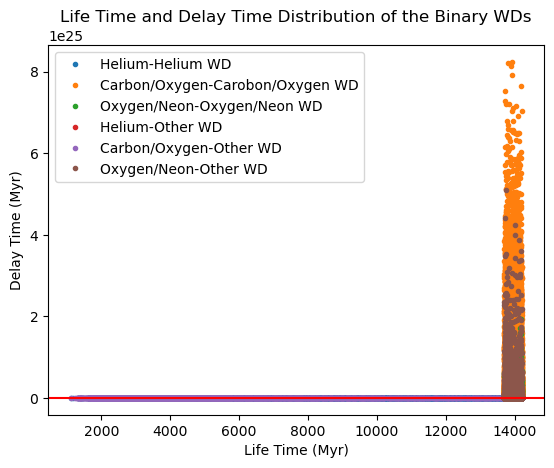

In [46]:
# let's look at the distirbution of separations
# look into seaborn
# maybe just do individual plots
# maybe ask floor or jared what a distributin plot would look like

plt.plot(HeWD_WD['Time'],HeWD_WD['Delay Time'],'.',label='Helium-Helium WD');
plt.plot(COWD_WD['Time'],COWD_WD['Delay Time'],'.',label='Carbon/Oxygen-Carobon/Oxygen WD');
plt.plot(ONeWD_WD['Time'],ONeWD_WD['Delay Time'],'.',label='Oxygen/Neon-Oxygen/Neon WD');
plt.plot(He_COMBOS['Time'],He_COMBOS['Delay Time'],'.',label='Helium-Other WD');
plt.plot(CO_COMBOS['Time'],CO_COMBOS['Delay Time'],'.',label='Carbon/Oxygen-Other WD');
plt.plot(ONe_COMBOS['Time'],ONe_COMBOS['Delay Time'],'.',label='Oxygen/Neon-Other WD');

# let's also plot the age of the universe to see what things are not merging before hubble time
plt.axhline(age_universe, color = 'r', linestyle = '-') 

plt.xlabel("Life Time (Myr)")
plt.ylabel("Delay Time (Myr)")
plt.title("Life Time and Delay Time Distribution of the Binary WDs")
plt.legend()

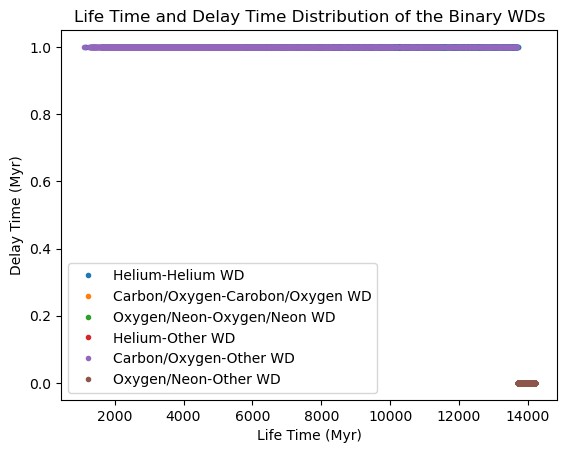

In [118]:
# let's zoom on this plot to just look at the binaires that had delay time below the age of the universe
plt.plot(HeWD_WD['Time'],HeWD_WD['Delay Time']<=age_universe,'.',label='Helium-Helium WD');
plt.plot(COWD_WD['Time'],COWD_WD['Delay Time']<=age_universe,'.',label='Carbon/Oxygen-Carobon/Oxygen WD');
plt.plot(ONeWD_WD['Time'],ONeWD_WD['Delay Time']<=age_universe,'.',label='Oxygen/Neon-Oxygen/Neon WD');
plt.plot(He_COMBOS['Time'],He_COMBOS['Delay Time']<=age_universe,'.',label='Helium-Other WD');
plt.plot(CO_COMBOS['Time'],CO_COMBOS['Delay Time']<=age_universe,'.',label='Carbon/Oxygen-Other WD');
plt.plot(ONe_COMBOS['Time'],ONe_COMBOS['Delay Time']<=age_universe,'.',label='Oxygen/Neon-Other WD');


plt.xlabel("Life Time (Myr)")
plt.ylabel("Delay Time (Myr)")
plt.title("Life Time and Delay Time Distribution of the Binary WDs")
plt.legend()

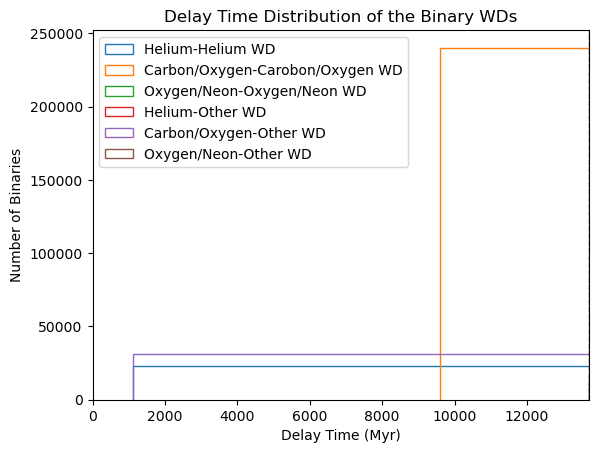

In [61]:
# let's also plot the delay time distribution as a histogram to see the distribution another way

# let's zoom on this plot to just look at the binaires that had delay time below the age of the universe
plt.hist(HeWD_WD['Delay Time'],histtype='step',label='Helium-Helium WD');
plt.hist(COWD_WD['Delay Time'],histtype='step',label='Carbon/Oxygen-Carobon/Oxygen WD');
plt.hist(ONeWD_WD['Delay Time'],histtype='step',label='Oxygen/Neon-Oxygen/Neon WD');
plt.hist(He_COMBOS['Delay Time'],histtype='step',label='Helium-Other WD');
plt.hist(CO_COMBOS['Delay Time'],histtype='step',label='Carbon/Oxygen-Other WD');
plt.hist(ONe_COMBOS['Delay Time'],histtype='step',label='Oxygen/Neon-Other WD');

# experimenting with the type of line to plot but still representing the age of the universe
plt.axvline(age_universe, color='k', linestyle='dashed', linewidth=1)

# changing the y limits to only see things that are less than or equal to hubble time
plt.xlim(0,age_universe)

plt.xlabel("Delay Time (Myr)")
plt.ylabel("Number of Binaries")
plt.title("Delay Time Distribution of the Binary WDs")
plt.legend()


In [41]:
# again let's check if there are any due to MT that are not due to GW
DOUBLE_WD_SYS[np.logical_and(DOUBLE_WD_SYS['Merger due to Mass Transfer']==1,DOUBLE_WD_SYS["Merger due to GW"]==0)]

,Eccentricity,Eccentricity@ZAMS,Evolution_Status,Mass(1),Mass(2),Mass@ZAMS(1),Mass@ZAMS(2),Merger due to any Event,Merger due to GW,Merger due to Mass Transfer,Metallicity@ZAMS(1),Metallicity@ZAMS(2),SEED,SemiMajorAxis,SemiMajorAxis@ZAMS,Stellar_Type(1),Stellar_Type(2),Stellar_Type@ZAMS(1),Stellar_Type@ZAMS(2),Time,Coalescence Time,Delay Time
845606,0.0,0.0,12,0.416001,0.177059,1.29071,0.863196,1,0,1,0.004318,0.004318,70606,0.034432,0.548580,10,10,1,1,13706.554843,0.004840,13706.559683
998672,0.0,0.0,12,0.415402,0.183267,1.25339,0.874696,1,0,1,0.005174,0.005174,823672,0.037951,0.579177,10,10,1,1,13700.515410,0.006847,13700.522257


Let's make a slice of the data where we only look at WD binaries that have the merger due to mass transfer flag on

In [42]:
DOUBLE_WD_MT = DOUBLE_WD_SYS[DOUBLE_WD_SYS['Merger due to Mass Transfer']==1]
DOUBLE_WD_MT

,Eccentricity,Eccentricity@ZAMS,Evolution_Status,Mass(1),Mass(2),Mass@ZAMS(1),Mass@ZAMS(2),Merger due to any Event,Merger due to GW,Merger due to Mass Transfer,Metallicity@ZAMS(1),Metallicity@ZAMS(2),SEED,SemiMajorAxis,SemiMajorAxis@ZAMS,Stellar_Type(1),Stellar_Type(2),Stellar_Type@ZAMS(1),Stellar_Type@ZAMS(2),Time,Coalescence Time,Delay Time
8,0.0,0.0,12,0.484894,0.206989,1.419083,1.046741,1,1,1,0.000908,0.000908,900008,0.040833,0.979382,10,10,1,1,5418.296910,0.006022,5418.302932
297,0.0,0.0,12,0.405721,0.193684,1.719299,1.168901,1,1,1,0.003998,0.003998,900297,0.023121,0.605289,10,10,1,1,4598.657331,0.000913,4598.658244
298,0.0,0.0,12,0.406934,0.203386,1.686156,1.142623,1,1,1,0.001592,0.001592,900298,0.028593,0.680078,10,10,1,1,4280.449855,0.001991,4280.451846
370,0.0,0.0,12,0.383217,0.288121,2.631955,1.126454,1,1,1,0.000100,0.000100,900370,0.046297,0.041620,11,10,1,1,2966.269036,0.009323,2966.278359
393,0.0,0.0,12,0.384157,0.174991,1.669602,0.870483,1,1,1,0.002518,0.002518,900393,0.031371,0.601778,10,10,1,1,11749.760415,0.003876,11749.764291
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
999235,0.0,0.0,12,0.344639,0.154295,1.508664,0.935387,1,1,1,0.009825,0.009825,824235,0.016306,0.388756,10,10,1,1,12257.918521,0.000401,12257.918922
999350,0.0,0.0,12,0.668609,0.193661,4.216529,1.217896,1,1,1,0.006578,0.006578,824350,0.032142,0.115531,11,10,1,1,4015.154612,0.001438,4015.156050
999362,0.0,0.0,12,0.215318,0.258882,1.591931,0.764054,1,1,1,0.001634,0.001634,824362,0.054231,0.025958,10,10,1,1,11829.471107,0.049225,11829.520332
999381,0.0,0.0,12,0.566512,0.210939,2.145946,1.050414,1,1,1,0.010350,0.010350,824381,0.059326,1.286455,11,10,1,1,8472.915125,0.020058,8472.935183


#### Let's look at the separation distribtions for systems that are WD binaries but don't have stellar mergers

In [119]:
DOUBLE_WD_SEP = DOUBLE_WD_SYS[DOUBLE_WD_SYS["Merger due to Mass Transfer"]==0]
DOUBLE_WD_SEP

,Eccentricity,Eccentricity@ZAMS,Evolution_Status,Mass(1),Mass(2),Mass@ZAMS(1),Mass@ZAMS(2),Merger due to any Event,Merger due to GW,Merger due to Mass Transfer,Metallicity@ZAMS(1),Metallicity@ZAMS(2),SEED,SemiMajorAxis,SemiMajorAxis@ZAMS,Stellar_Type(1),Stellar_Type(2),Stellar_Type@ZAMS(1),Stellar_Type@ZAMS(2),Time,Coalescence Time,Delay Time
0,0.0,0.0,3,0.672887,0.545816,1.328400,0.882688,0,0,0,0.004488,0.004488,900000,13855.371248,35.495599,11,11,1,1,13806.051158,1.238602e+19,1.238602e+19
1,0.0,0.0,3,0.637262,0.518886,2.022025,1.064154,0,0,0,0.027780,0.027780,900001,69211.395904,120.154409,11,11,1,1,13993.620075,9.029259e+21,9.029259e+21
2,0.0,0.0,3,0.631982,0.607620,1.536448,1.398097,0,0,0,0.008525,0.008525,900002,81861.122032,160.402708,11,11,1,1,13715.419212,1.419180e+22,1.419180e+22
4,0.0,0.0,3,0.792319,0.608075,2.525490,1.456961,0,0,0,0.010712,0.010712,900004,81316.119336,132.456239,11,11,1,1,13957.081171,9.748646e+21,9.748646e+21
6,0.0,0.0,3,0.572856,0.556232,1.037316,0.950988,0,0,0,0.001157,0.001157,900006,2615.459719,6.903571,11,11,1,1,14188.182516,1.956629e+16,1.956629e+16
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
999985,0.0,0.0,3,0.709415,0.708621,1.314792,1.312906,0,0,0,0.000203,0.000203,824985,208546.860794,523.074727,11,11,1,1,14154.452352,3.991697e+23,3.991697e+23
999987,0.0,0.0,3,0.418350,0.374019,2.943874,1.674482,0,0,0,0.001776,0.001776,824987,1.091592,0.046554,11,11,1,1,13830.673842,1.722763e+03,1.555344e+04
999991,0.0,0.0,3,1.380350,0.842031,6.007401,2.037017,0,0,0,0.000359,0.000359,824991,275830.942101,629.397819,12,11,1,1,13965.972127,3.371172e+23,3.371172e+23
999993,0.0,0.0,3,0.771320,0.568083,2.436778,1.375024,0,0,0,0.002359,0.002359,824993,436533.288169,710.109670,11,11,1,1,13723.066421,9.308004e+24,9.308004e+24


In [66]:
# let's gatther the different WD binary groups
HeWD_bool_SEP,COWD_bool_SEP,ONeWD_bool_SEP,HeCOWD_bool_SEP,HeONeWD_bool_SEP,COHeWD_bool_SEP,COONeWD_bool_SEP,ONeHeWD_bool_SEP,ONeCOWD_bool_SEP = WD_BINARY_BOOLS(DOUBLE_WD_SEP)

# same type WD-WD binaries
HeWD_WD_SEP = DOUBLE_WD_SEP[HeWD_bool_SEP]
COWD_WD_SEP = DOUBLE_WD_SEP[COWD_bool_SEP]
ONeWD_WD_SEP = DOUBLE_WD_SEP[ONeWD_bool_SEP]

# conbinations of the above bianries
He_COMBOS_SEP = DOUBLE_WD_SEP.loc[HeCOWD_bool_SEP|HeONeWD_bool_SEP]

CO_COMBOS_SEP = DOUBLE_WD_SEP.loc[COHeWD_bool_SEP|COONeWD_bool_SEP]

ONe_COMBOS_SEP = DOUBLE_WD_SEP.loc[ONeHeWD_bool_SEP|ONeCOWD_bool_SEP]


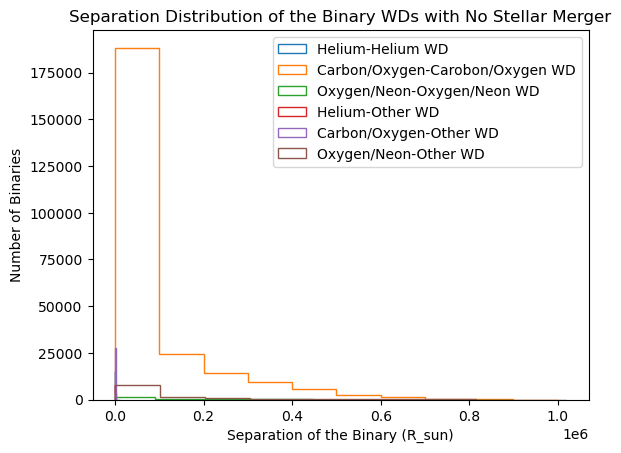

In [121]:
# let's look at the distirbution of separations
# look into seaborn
# maybe just do individual plots
# maybe ask floor or jared what a distributin plot would look like

plt.hist(HeWD_WD_SEP['SemiMajorAxis'],histtype='step',label='Helium-Helium WD');
plt.hist(COWD_WD_SEP['SemiMajorAxis'],histtype='step',label='Carbon/Oxygen-Carobon/Oxygen WD');
plt.hist(ONeWD_WD_SEP['SemiMajorAxis'],histtype='step',label='Oxygen/Neon-Oxygen/Neon WD');
plt.hist(He_COMBOS_SEP['SemiMajorAxis'],histtype='step',label='Helium-Other WD');
plt.hist(CO_COMBOS_SEP['SemiMajorAxis'],histtype='step',label='Carbon/Oxygen-Other WD');
plt.hist(ONe_COMBOS_SEP['SemiMajorAxis'],histtype='step',label='Oxygen/Neon-Other WD');


plt.xlabel("Separation of the Binary (R_sun)")
plt.ylabel("Number of Binaries")
plt.title("Separation Distribution of the Binary WDs with No Stellar Merger")
plt.legend()

Let's now look at the mass distirbution of these non stellar merger WD bianries

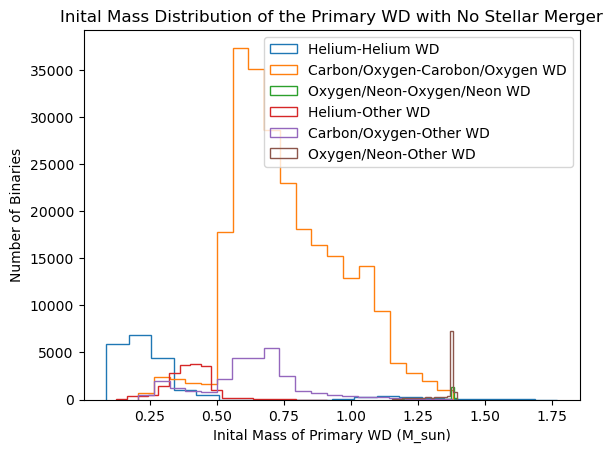

In [122]:
plt.hist(HeWD_WD_SEP['Mass(1)'],histtype='step',label='Helium-Helium WD',bins=20);
plt.hist(COWD_WD_SEP['Mass(1)'],histtype='step',label='Carbon/Oxygen-Carobon/Oxygen WD',bins=20);
plt.hist(ONeWD_WD_SEP['Mass(1)'],histtype='step',label='Oxygen/Neon-Oxygen/Neon WD',bins=20);
plt.hist(He_COMBOS_SEP['Mass(1)'],histtype='step',label='Helium-Other WD',bins=20);
plt.hist(CO_COMBOS_SEP['Mass(1)'],histtype='step',label='Carbon/Oxygen-Other WD',bins=20);
plt.hist(ONe_COMBOS_SEP['Mass(1)'],histtype='step',label='Oxygen/Neon-Other WD',bins=20);
plt.xlabel("Inital Mass of Primary WD (M_sun)")
plt.ylabel("Number of Binaries")
plt.title("Inital Mass Distribution of the Primary WD with No Stellar Merger")
plt.legend()

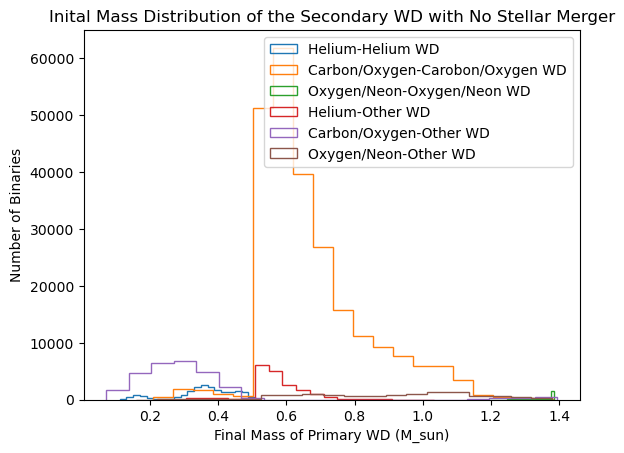

In [123]:
plt.hist(HeWD_WD_SEP['Mass(2)'],histtype='step',label='Helium-Helium WD',bins=20);
plt.hist(COWD_WD_SEP['Mass(2)'],histtype='step',label='Carbon/Oxygen-Carobon/Oxygen WD',bins=20);
plt.hist(ONeWD_WD_SEP['Mass(2)'],histtype='step',label='Oxygen/Neon-Oxygen/Neon WD',bins=20);
plt.hist(He_COMBOS_SEP['Mass(2)'],histtype='step',label='Helium-Other WD',bins=20);
plt.hist(CO_COMBOS_SEP['Mass(2)'],histtype='step',label='Carbon/Oxygen-Other WD',bins=20);
plt.hist(ONe_COMBOS_SEP['Mass(2)'],histtype='step',label='Oxygen/Neon-Other WD',bins=20);
plt.xlabel("Final Mass of Primary WD (M_sun)")
plt.ylabel("Number of Binaries")
plt.title("Inital Mass Distribution of the Secondary WD with No Stellar Merger")
plt.legend()

Let's plot the delay time versus the coalescence time (and see the distribution of different WD binaries)

/tmp/ipykernel_1205207/4195217876.py:3: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  cm = plt.cm.get_cmap('RdYlBu')
/mnt/sw/nix/store/gpkc8q6zjnp3n3h3w9hbmbj6gjbxs85w-python-3.10.10-view/lib/python3.10/site-packages/pandas/core/arraylike.py:396: RuntimeWarning: divide by zero encountered in log10
  result = getattr(ufunc, method)(*inputs, **kwargs)


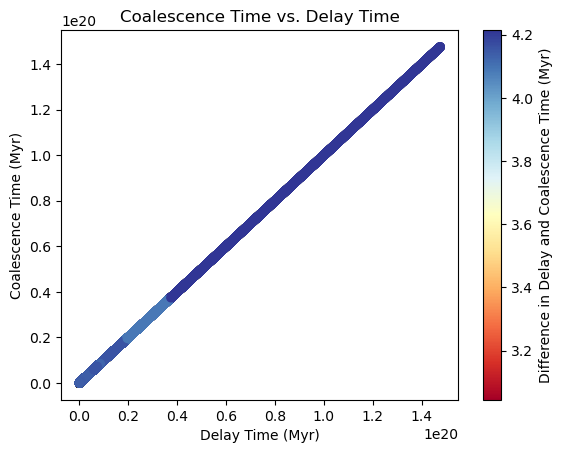

In [76]:
time_diff = DOUBLE_WD_SYS['Delay Time'] - DOUBLE_WD_SYS['Coalescence Time']

cm = plt.cm.get_cmap('RdYlBu')
sc = plt.scatter(DOUBLE_WD_SYS['Delay Time'],DOUBLE_WD_SYS['Coalescence Time'],c=np.log10(time_diff), s=35, cmap=cm)
plt.xlabel("Delay Time (Myr)")
plt.ylabel("Coalescence Time (Myr)")
plt.title("Coalescence Time vs. Delay Time")
plt.colorbar(sc, label="Difference in Delay and Coalescence Time (Myr)")

Let's save this table as a csv!

In [78]:
# saving our table as a csv
# DOUBLE_WD_SYS.to_csv('Binary_WD_info.txt', index=False)

### We now want to look at the RLOF properties of these SEEDs

In [127]:
# we want to read in the bse_RLOF to get information about thes different systems

RLOF_SYS = pd.DataFrame() # making a pandas dataframe

for key in Data_2["BSE_RLOF"].keys(): #looping through the "keys" or paramters in BSE_System_Parameters

    RLOF_SYS[key] = Data_2["BSE_RLOF"][key][()] # adding these columns to the dataframe

In [128]:
RLOF_SYS

,Beta,CEE>MT,Eccentricity<MT,Eccentricity>MT,Luminosity(1),Luminosity(2),MT_Event_Counter,Mass(1)<MT,Mass(1)>MT,Mass(2)<MT,Mass(2)>MT,MassTransferRateDonor,Merger,Metallicity@ZAMS(1),RLOF(1)<MT,RLOF(1)>MT,RLOF(2)<MT,RLOF(2)>MT,Radius(1)<MT,Radius(1)>MT,Radius(1)|RL<step,Radius(1)|RL>step,Radius(2)<MT,Radius(2)>MT,Radius(2)|RL<step,Radius(2)|RL>step,Record_Type,SEED,SemiMajorAxis<MT,SemiMajorAxis>MT,Stellar_Type(1)<MT,Stellar_Type(1)>MT,Stellar_Type(2)<MT,Stellar_Type(2)>MT,Teff(1),Teff(2),Time<MT,Time>MT,Zeta_Hurley(1),Zeta_Hurley(2),Zeta_Hurley_He(1),Zeta_Hurley_He(2),Zeta_Soberman(1),Zeta_Soberman(2),Zeta_Soberman_He(1),Zeta_Soberman_He(2)
0,0.000004,0,0.0,0.0,80.430045,0.105445,1,0.825617,0.461183,0.565960,0.565962,7411.903403,0,0.001600,0,1,0,0,119.805365,0.014853,1.010061,0.000119,0.517722,0.517724,0.005186,0.003788,1,900003,287.901134,344.506740,3,10,0,0,141978.402768,4575.992782,7680.396683,7680.470737,0.000000,-0.239948,0.000000,-0.239948,0.000000,-0.333333,0.000000,-0.333333
1,0.000180,1,0.0,0.0,67.416305,2.450749,1,1.373332,0.484894,1.046741,1.046741,4080.076594,0,0.000908,0,1,0,0,87.658313,0.014465,1.014591,0.004797,0.985190,0.985190,0.012909,0.230083,1,900008,214.580624,9.583364,3,10,1,1,137662.170109,7283.534659,2136.546394,2136.582588,0.000000,-0.217282,0.000000,-0.217282,0.000000,-0.333333,0.000000,-0.333333
2,1.000000,1,0.0,0.0,0.000032,28.778335,2,0.484894,0.484894,1.045742,0.206989,1.603274,1,0.000908,0,0,0,1,0.014465,0.014465,0.004793,0.780111,4.334885,0.021111,1.011909,1.677673,1,900008,9.589619,0.040833,10,10,3,10,3615.552810,92106.861333,5413.907596,5418.296910,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
3,0.000925,1,0.0,0.0,99.914887,0.020251,1,2.130319,0.300608,0.312392,0.312392,6.568770,1,0.000263,0,1,0,0,4.397725,4.397725,1.087276,276.425776,0.294400,0.294400,0.172516,18.182667,1,900009,7.393770,0.042357,2,2,0,0,8711.060475,4017.178418,632.531987,632.850163,0.000000,-0.163580,0.000000,-0.163580,0.000000,-0.333333,0.000000,-0.333333
4,0.348305,0,0.0,0.0,67.495194,1.739594,1,1.229807,0.146792,0.815584,1.192804,0.275219,0,0.018059,0,1,0,0,2.365612,0.024025,1.004568,0.001623,0.768827,1.141591,0.393822,0.030155,1,900010,5.675490,67.422690,2,10,1,1,106848.256225,6210.610207,5126.906504,5140.120180,0.000000,-0.300660,0.000000,-0.300660,0.000000,-0.333333,0.000000,-0.333333
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1100584,0.575450,0,0.0,0.0,21.473683,5.360572,1,1.924002,1.568897,1.185687,1.390033,1.600967,0,0.004428,0,1,0,0,2.720246,2.348647,1.005816,1.033748,1.173404,1.250025,0.541144,0.581479,1,824996,6.417657,5.833902,1,2,1,1,8116.061747,7863.591167,931.593913,941.831096,-0.269155,-0.269240,-0.269155,-0.269240,-0.121381,-0.333333,-0.121381,-0.333333
1100585,1.000000,0,0.0,0.0,54.868888,74.143804,2,1.568897,0.209383,1.390033,2.749547,1.046030,0,0.004428,1,1,0,0,2.443817,0.021017,1.075637,0.001336,1.275023,1.561934,0.593107,0.031618,1,824996,5.833902,82.438310,2,10,1,1,108474.155851,13566.407413,941.831096,943.555813,0.000000,-0.269240,0.000000,-0.269240,0.000000,-0.333333,0.000000,-0.333333
1100586,1.000000,1,0.0,0.0,0.000421,1587.241662,3,0.209383,0.209383,2.717656,0.718716,828.790481,1,0.004428,0,0,0,1,0.021017,0.021017,0.001317,1.891186,49.920923,0.262059,1.001115,13.475230,1,824996,83.336507,0.039854,10,10,5,8,5707.447938,71242.369701,1394.202491,1394.226016,0.000000,0.063853,0.000000,0.000000,0.000000,1.483414,0.000000,0.000000
1100587,0.013157,1,0.0,0.0,553.702041,0.870506,1,3.808858,3.808858,0.925453,0.925453,19.572894,1,0.002886,0,1,0,0,4.227692,4.227692,1.009286,1.009286,0.859660,0.859660,0.389442,0.389442,1,824997,8.312955,8.312955,1,1,1,1,13631.539173,6019.452494,164.386413,166.135617,-0.258697,-0.258697,-0.258697,-0.258697,-0.333333,-0.333333,-0.333333,-0.333333


In [129]:
# let's first look at the units of some parameters to see if anything must be converted
RLOF_s = Data_2['BSE_RLOF']
print(RLOF_s['SemiMajorAxis<MT'].attrs['units']) 
print(RLOF_s['Radius(1)>MT'].attrs['units']) 

b'Rsol'
b'Rsol'


In [130]:
# let's get the properties of these WDs that experience merger due to mass transfer in system paramters
SP_WD_SEEDS = DOUBLE_WD_MT['SEED']

# let's now only select the seeds in this table that overlap with RLOF table
overlap_seeds_bool = np.in1d(RLOF_SYS['SEED'],SP_WD_SEEDS,assume_unique=True)

In [131]:
# reading in the sliced SPs table
RLOF_WD_SYS = RLOF_SYS[overlap_seeds_bool]
RLOF_WD_SYS

,Beta,CEE>MT,Eccentricity<MT,Eccentricity>MT,Luminosity(1),Luminosity(2),MT_Event_Counter,Mass(1)<MT,Mass(1)>MT,Mass(2)<MT,Mass(2)>MT,MassTransferRateDonor,Merger,Metallicity@ZAMS(1),RLOF(1)<MT,RLOF(1)>MT,RLOF(2)<MT,RLOF(2)>MT,Radius(1)<MT,Radius(1)>MT,Radius(1)|RL<step,Radius(1)|RL>step,Radius(2)<MT,Radius(2)>MT,Radius(2)|RL<step,Radius(2)|RL>step,Record_Type,SEED,SemiMajorAxis<MT,SemiMajorAxis>MT,Stellar_Type(1)<MT,Stellar_Type(1)>MT,Stellar_Type(2)<MT,Stellar_Type(2)>MT,Teff(1),Teff(2),Time<MT,Time>MT,Zeta_Hurley(1),Zeta_Hurley(2),Zeta_Hurley_He(1),Zeta_Hurley_He(2),Zeta_Soberman(1),Zeta_Soberman(2),Zeta_Soberman_He(1),Zeta_Soberman_He(2)
1,1.800453e-04,1,0.0,0.0,67.416305,2.450749,1,1.373332,0.484894,1.046741,1.046741,4080.076594,0,0.000908,0,1,0,0,87.658313,0.014465,1.014591,0.004797,0.985190,0.985190,0.012909,0.230083,1,900008,214.580624,9.583364,3,10,1,1,137662.170109,7283.534659,2136.546394,2136.582588,0.000000,-0.217282,0.000000,-0.217282,0.000000,-0.333333,0.000000,-0.333333
2,1.000000e+00,1,0.0,0.0,0.000032,28.778335,2,0.484894,0.484894,1.045742,0.206989,1.603274,1,0.000908,0,0,0,1,0.014465,0.014465,0.004793,0.780111,4.334885,0.021111,1.011909,1.677673,1,900008,9.589619,0.040833,10,10,3,10,3615.552810,92106.861333,5413.907596,5418.296910,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
4,3.483055e-01,0,0.0,0.0,67.495194,1.739594,1,1.229807,0.146792,0.815584,1.192804,0.275219,0,0.018059,0,1,0,0,2.365612,0.024025,1.004568,0.001623,0.768827,1.141591,0.393822,0.030155,1,900010,5.675490,67.422690,2,10,1,1,106848.256225,6210.610207,5126.906504,5140.120180,0.000000,-0.300660,0.000000,-0.300660,0.000000,-0.333333,0.000000,-0.333333
6,6.278652e-03,0,0.0,0.0,104.922638,3.102078,1,4.695694,0.786718,1.119037,1.143581,118.601151,0,0.000285,0,1,0,0,10.540471,0.169311,1.000421,0.221492,0.925444,0.939400,0.168120,1.035970,1,900011,20.839634,2.202671,2,7,1,1,44941.999462,7911.619139,100.227725,100.257539,-0.166656,-0.166656,0.000000,-0.166656,-0.333333,-0.333333,0.000000,-0.333333
7,1.000000e+00,0,0.0,0.0,203.200166,1.638895,2,0.786718,0.942451,1.143581,0.987848,0.081287,0,0.000285,1,0,0,1,0.172891,0.197628,0.226176,0.256415,0.939765,0.839961,1.036373,1.066642,1,900011,2.202671,2.056089,7,7,1,1,49072.056136,7133.220848,100.257539,102.173377,-0.166656,-0.166656,0.000000,-0.166656,-0.333333,-0.333333,0.000000,-0.333333
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1100573,1.721074e-05,0,0.0,0.0,0.000017,1.664785,15,0.596435,0.596435,1.062687,1.055828,0.000077,0,0.021814,0,0,1,1,0.012827,0.012827,0.014236,0.014298,1.243129,1.250260,1.060111,1.073958,1,824978,2.728837,2.712736,11,11,1,1,3292.530369,5869.714764,4019.439746,4108.909909,0.000000,-0.307228,1.692747,-0.307228,0.000000,-0.333333,274859.040373,-0.333333
1100574,2.643862e-11,0,0.0,0.0,0.000017,1.157720,16,0.596435,0.596435,1.055828,0.851291,0.061850,0,0.021814,0,0,1,1,0.012827,0.012827,0.014298,0.015346,1.242514,1.345565,1.067305,1.368473,1,824978,2.712736,2.397843,11,11,1,2,3265.888114,5166.852073,4108.909909,4200.587195,0.000000,-0.307188,1.692747,-0.307188,0.000000,-0.149258,274858.012930,-0.149258
1100579,2.294918e-01,0,0.0,0.0,7.858648,39.785575,1,2.943731,0.418613,1.674482,2.253976,13.653379,0,0.001776,0,1,0,0,4.438340,0.088697,1.034590,0.005675,1.181782,1.298654,0.356346,0.038879,1,824987,10.010856,63.370978,2,7,1,1,32483.258598,12733.921227,310.300125,310.416048,-0.243644,-0.243644,0.000000,-0.243644,-0.333333,-0.333333,0.000000,-0.333333
1100584,5.754504e-01,0,0.0,0.0,21.473683,5.360572,1,1.924002,1.568897,1.185687,1.390033,1.600967,0,0.004428,0,1,0,0,2.720246,2.348647,1.005816,1.033748,1.173404,1.250025,0.541144,0.581479,1,824996,6.417657,5.833902,1,2,1,1,8116.061747,7863.591167,931.593913,941.831096,-0.269155,-0.269240,-0.269155,-0.269240,-0.121381,-0.333333,-0.121381,-0.333333


It is strange that it seems that some of the final states of these systems are not WDs but this could the same seed evolving and experiencing RLOF many times

In [132]:
# let's look the inital and final stellar type of the donar - let's start with when star 1 is the donar
RLOF_WD_SYS_1 = RLOF_WD_SYS[RLOF_WD_SYS['RLOF(1)>MT']==1]

Text(0.5, 1.0, 'The Stellar Type of Star 1 as a Donor')

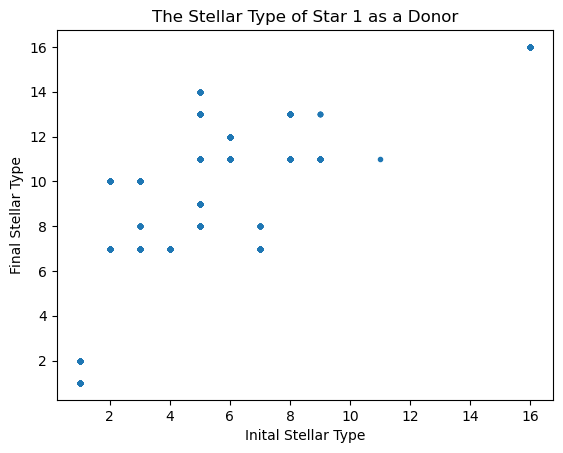

In [133]:
# let's plot the inital and final stellar type of this donar
plt.plot(RLOF_WD_SYS_1['Stellar_Type(1)<MT'],RLOF_WD_SYS_1['Stellar_Type(1)>MT'],'.')
plt.xlabel("Inital Stellar Type")
plt.ylabel("Final Stellar Type")
plt.title("The Stellar Type of Star 1 as a Donor")

Text(0.5, 1.0, 'The Separation Distribution of Star 1 as a Donor')

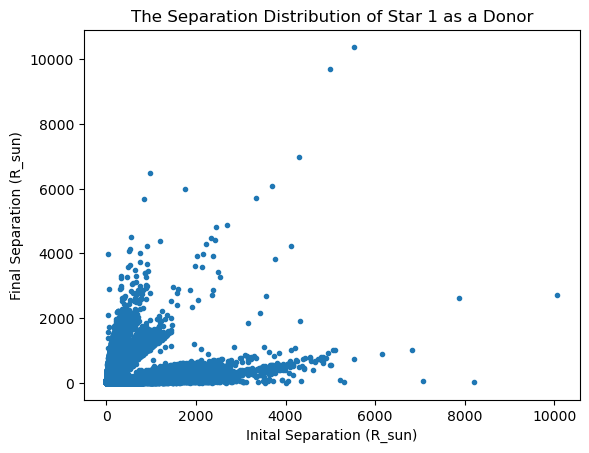

In [86]:
# let's look at the separation before and after mass transfer of these systems
plt.plot(RLOF_WD_SYS_1['SemiMajorAxis<MT'],RLOF_WD_SYS_1['SemiMajorAxis>MT'],'.')
plt.xlabel("Inital Separation (R_sun)")
plt.ylabel("Final Separation (R_sun)")
plt.title("The Separation Distribution of Star 1 as a Donor")

In [134]:
# let's see how many systems represent Star 1 as a WD in the final state
RLOF_DOUBLE_WD_SYS_1 = RLOF_WD_SYS_1.loc[(RLOF_WD_SYS_1['Stellar_Type(1)>MT']==10)|(RLOF_WD_SYS_1['Stellar_Type(1)>MT']==11)|(RLOF_WD_SYS_1['Stellar_Type(1)>MT']==12)]

This is a lot of data so let's just look at when the final types are both WDs

In [135]:
# let's look the inital and final stellar type of the donar - let's start with when star 1 is the donar
RLOF_DOUBLE_WD_SYS_1 = RLOF_DOUBLE_WD_SYS_1.loc[(RLOF_DOUBLE_WD_SYS_1['Stellar_Type(2)>MT']==10)|(RLOF_DOUBLE_WD_SYS_1['Stellar_Type(2)>MT']==11)|(RLOF_DOUBLE_WD_SYS_1['Stellar_Type(2)>MT']==12)]
RLOF_DOUBLE_WD_SYS_1

,Beta,CEE>MT,Eccentricity<MT,Eccentricity>MT,Luminosity(1),Luminosity(2),MT_Event_Counter,Mass(1)<MT,Mass(1)>MT,Mass(2)<MT,Mass(2)>MT,MassTransferRateDonor,Merger,Metallicity@ZAMS(1),RLOF(1)<MT,RLOF(1)>MT,RLOF(2)<MT,RLOF(2)>MT,Radius(1)<MT,Radius(1)>MT,Radius(1)|RL<step,Radius(1)|RL>step,Radius(2)<MT,Radius(2)>MT,Radius(2)|RL<step,Radius(2)|RL>step,Record_Type,SEED,SemiMajorAxis<MT,SemiMajorAxis>MT,Stellar_Type(1)<MT,Stellar_Type(1)>MT,Stellar_Type(2)<MT,Stellar_Type(2)>MT,Teff(1),Teff(2),Time<MT,Time>MT,Zeta_Hurley(1),Zeta_Hurley(2),Zeta_Hurley_He(1),Zeta_Hurley_He(2),Zeta_Soberman(1),Zeta_Soberman(2),Zeta_Soberman_He(1),Zeta_Soberman_He(2)
864,0.680166,1,0.0,0.0,86.504126,65.001917,1,0.973182,0.234665,0.971409,0.176335,10.741790,1,0.010393,0,1,0,0,9.159828,0.020095,1.012778,4.720644,3.454412,0.022443,0.382264,6.007294,1,900710,23.858548,0.010540,3,10,3,10,124305.589320,109513.476857,11017.058166,11018.744601,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2062,1.000000,1,0.0,0.0,67.067373,53.589536,1,1.439814,0.314135,1.439518,0.251007,97.388176,1,0.002653,0,1,0,0,25.672714,0.017805,1.013817,1.951168,10.689463,0.019559,0.422167,2.374678,1,901921,66.825729,0.022900,3,10,3,10,123917.946789,111782.852490,2260.701814,2260.962404,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
6067,1.000000,1,0.0,0.0,56.970825,53.979228,1,0.931070,0.164956,0.928387,0.156294,0.402789,1,0.008831,0,1,0,0,2.784275,0.023011,1.006115,13.630129,2.356807,0.023476,0.852771,14.252730,1,905843,7.298439,0.004401,3,10,3,10,104646.391842,102216.388242,12227.341713,12237.386125,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
6373,1.000000,1,0.0,0.0,19.974662,16.419551,1,1.063749,0.275525,1.061098,0.226487,15.594880,1,0.000178,0,1,0,0,9.605666,0.018825,1.007499,2.987085,4.973600,0.020380,0.522256,3.536771,1,906205,25.147064,0.015914,3,10,3,10,89029.080609,81473.285336,4900.690539,4901.999034,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
12489,1.000000,1,0.0,0.0,26.936241,22.747409,1,1.061685,0.246090,1.056214,0.207820,7.032695,1,0.000499,0,1,0,0,7.410435,0.019716,1.005871,4.297503,4.167302,0.021078,0.566994,4.963212,1,911769,19.419627,0.011655,3,10,3,10,93746.033334,86915.275989,5034.699074,5036.702272,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1085284,1.000000,1,0.0,0.0,36.084687,32.415428,1,0.991897,0.273424,0.993446,0.245621,22.769705,1,0.000797,0,1,0,0,11.185975,0.018885,1.009714,2.132758,7.729257,0.019731,0.697192,2.340232,1,810893,29.247065,0.022807,3,10,3,10,103050.955564,98149.848928,6463.803260,6464.913944,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1088562,1.000000,1,0.0,0.0,47.055909,41.284117,1,1.189020,0.219300,1.180389,0.192401,3.560725,1,0.002687,0,1,0,0,6.685281,0.020640,1.003569,7.366636,4.148381,0.021713,0.624816,8.226861,1,813765,17.551006,0.007179,3,10,3,10,105334.663999,99394.783146,4099.809572,4102.323912,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1090685,1.000000,1,0.0,0.0,94.930935,79.223983,1,1.220064,0.204658,1.210218,0.170796,2.614397,1,0.018460,0,1,0,0,5.877662,0.021204,1.009519,0.957297,3.203492,0.022714,0.552257,1.113813,1,815552,15.336930,0.056121,3,10,3,10,123858.412544,114379.416175,5728.530583,5731.117225,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1092098,1.000000,1,0.0,0.0,33.644559,32.468046,1,1.433608,0.248375,1.431645,0.239690,6.072047,1,0.000851,0,1,0,0,7.606161,0.019643,1.002384,6.325391,6.737973,0.019926,0.888525,6.521838,1,816873,20.019233,0.008129,3,10,3,10,99290.474605,97708.708536,2008.375125,2009.381418,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


Text(0.5, 1.0, 'The Stellar Type of Star 1 as a Donor in the WD Binary')

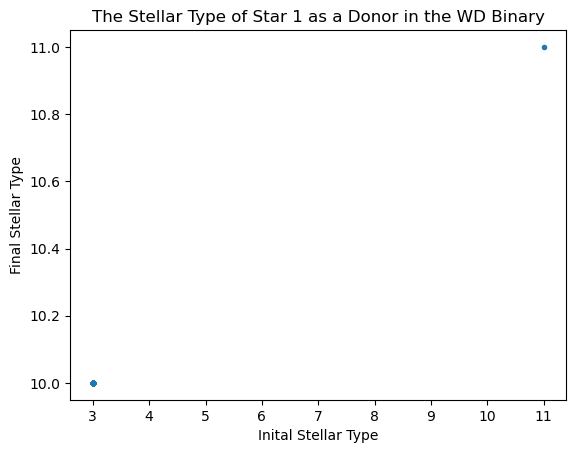

In [136]:
# let's look at the properties of these binaries
# let's plot the inital and final stellar type of the donar
plt.plot(RLOF_DOUBLE_WD_SYS_1['Stellar_Type(1)<MT'],RLOF_DOUBLE_WD_SYS_1['Stellar_Type(1)>MT'],'.')
plt.xlabel("Inital Stellar Type")
plt.ylabel("Final Stellar Type")
plt.title("The Stellar Type of Star 1 as a Donor in the WD Binary")

Text(0.5, 1.0, 'The Separation Distribution of Star 1 as a Donor in the WD Binary')

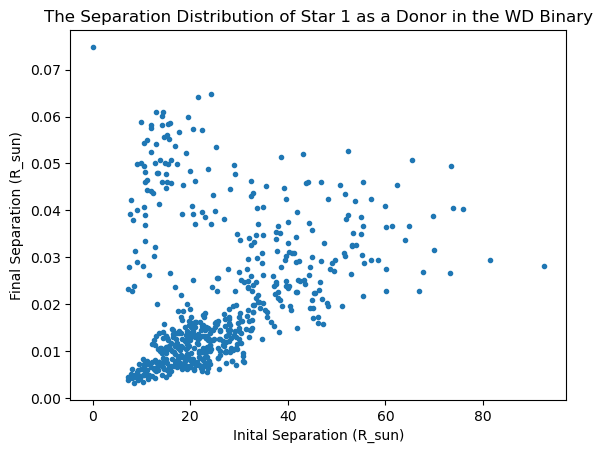

In [137]:
# let's look at the separation before and after mass transfer of these systems
plt.plot(RLOF_DOUBLE_WD_SYS_1['SemiMajorAxis<MT'],RLOF_DOUBLE_WD_SYS_1['SemiMajorAxis>MT'],'.')
plt.xlabel("Inital Separation (R_sun)")
plt.ylabel("Final Separation (R_sun)")
plt.title("The Separation Distribution of Star 1 as a Donor in the WD Binary")

Let's now look at star 2 as the donar!

In [138]:
# let's look the inital and final stellar type of the donar - let's start with when star 1 is the donar
RLOF_WD_SYS_2 = RLOF_WD_SYS[RLOF_WD_SYS['RLOF(2)>MT']==1]

Text(0.5, 1.0, 'The Stellar Type of Star 2 as a Donor')

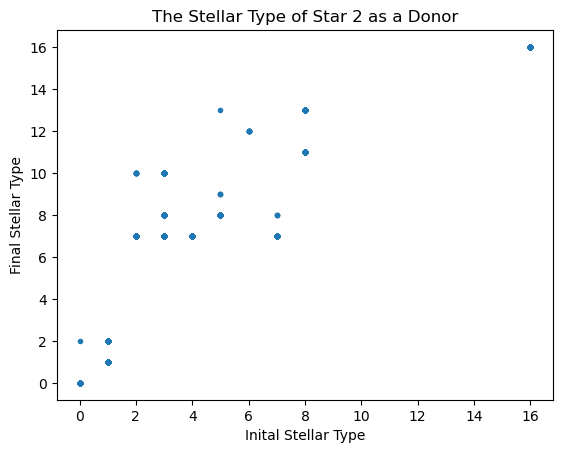

In [139]:
# let's plot the inital and final stellar type of this donar
plt.plot(RLOF_WD_SYS_2['Stellar_Type(2)<MT'],RLOF_WD_SYS_2['Stellar_Type(2)>MT'],'.')
plt.xlabel("Inital Stellar Type")
plt.ylabel("Final Stellar Type")
plt.title("The Stellar Type of Star 2 as a Donor")

Text(0.5, 1.0, 'The Separation Distribution of Star 2 as a Donor')

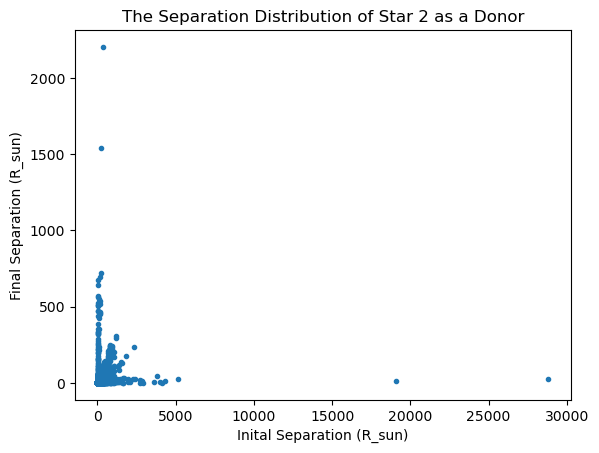

In [140]:
# let's look at the separation before and after mass transfer of these systems
plt.plot(RLOF_WD_SYS_2['SemiMajorAxis<MT'],RLOF_WD_SYS_2['SemiMajorAxis>MT'],'.')
plt.xlabel("Inital Separation (R_sun)")
plt.ylabel("Final Separation (R_sun)")
plt.title("The Separation Distribution of Star 2 as a Donor")

Let's look at the systems that are WD binaires in their final states

In [141]:
# let's see how many systems represent Star 2 as a WD in the final state
RLOF_DOUBLE_WD_SYS_2 = RLOF_WD_SYS_2.loc[(RLOF_WD_SYS_2['Stellar_Type(1)>MT']==10)|(RLOF_WD_SYS_2['Stellar_Type(1)>MT']==11)|(RLOF_WD_SYS_2['Stellar_Type(1)>MT']==12)]

In [142]:
# let's look the inital and final stellar type of the donar - let's start with when star 2 is the donar
RLOF_DOUBLE_WD_SYS_2 = RLOF_DOUBLE_WD_SYS_2.loc[(RLOF_DOUBLE_WD_SYS_2['Stellar_Type(2)>MT']==10)|(RLOF_DOUBLE_WD_SYS_2['Stellar_Type(2)>MT']==11)|(RLOF_DOUBLE_WD_SYS_2['Stellar_Type(2)>MT']==12)]
RLOF_DOUBLE_WD_SYS_2

,Beta,CEE>MT,Eccentricity<MT,Eccentricity>MT,Luminosity(1),Luminosity(2),MT_Event_Counter,Mass(1)<MT,Mass(1)>MT,Mass(2)<MT,Mass(2)>MT,MassTransferRateDonor,Merger,Metallicity@ZAMS(1),RLOF(1)<MT,RLOF(1)>MT,RLOF(2)<MT,RLOF(2)>MT,Radius(1)<MT,Radius(1)>MT,Radius(1)|RL<step,Radius(1)|RL>step,Radius(2)<MT,Radius(2)>MT,Radius(2)|RL<step,Radius(2)|RL>step,Record_Type,SEED,SemiMajorAxis<MT,SemiMajorAxis>MT,Stellar_Type(1)<MT,Stellar_Type(1)>MT,Stellar_Type(2)<MT,Stellar_Type(2)>MT,Teff(1),Teff(2),Time<MT,Time>MT,Zeta_Hurley(1),Zeta_Hurley(2),Zeta_Hurley_He(1),Zeta_Hurley_He(2),Zeta_Soberman(1),Zeta_Soberman(2),Zeta_Soberman_He(1),Zeta_Soberman_He(2)
2,1.000000e+00,1,0.0,0.0,0.000032,28.778335,2,0.484894,0.484894,1.045742,0.206989,1.603274,1,0.000908,0,0,0,1,0.014465,0.014465,0.004793,0.780111,4.334885,0.021111,1.011909,1.677673,1,900008,9.589619,0.040833,10,10,3,10,3615.552810,92106.861333,5413.907596,5418.296910,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
446,1.000000e+00,1,0.0,0.0,0.000051,48.721627,2,0.405721,0.405721,1.167869,0.193684,1.059740,1,0.003998,0,0,0,1,0.015839,0.015839,0.006585,1.542490,3.902614,0.021658,1.003341,2.954373,1,900297,8.233740,0.023121,10,10,3,10,3882.808919,103728.954470,4594.037369,4598.657331,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
448,1.000000e+00,1,0.0,0.0,0.000040,35.400052,2,0.406934,0.406934,1.141616,0.203386,1.499524,1,0.001592,0,0,0,1,0.015816,0.015816,0.005600,1.257060,4.558812,0.021255,1.009897,2.317526,1,900298,9.602143,0.028593,10,10,3,10,3643.609308,96672.058130,4276.149495,4280.449855,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
492,6.387882e-17,1,0.0,0.0,0.000002,16.596023,2,0.383217,0.383217,1.257757,0.288121,17.825649,1,0.000100,0,0,0,1,0.016277,0.016277,0.002620,0.870589,10.729478,0.018476,1.006969,1.125700,1,900370,22.014258,0.046297,11,11,3,10,1761.795349,85798.185581,2965.388852,2966.269036,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
512,1.000000e+00,1,0.0,0.0,0.000008,36.589492,2,0.384157,0.384157,0.869500,0.174991,0.575539,1,0.002518,0,0,0,1,0.016258,0.016258,0.007693,1.156011,3.087895,0.022508,1.007182,2.289889,1,900393,6.797617,0.031371,10,10,3,10,2389.129131,94721.867393,11740.904391,11749.760415,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1099771,1.000000e+00,1,0.0,0.0,0.000013,55.611810,2,0.344639,0.344639,0.934761,0.154295,0.224049,1,0.009825,0,0,0,1,0.017091,0.017091,0.011880,2.330055,2.288448,0.023588,1.010449,4.637521,1,824235,4.848396,0.016306,10,10,3,10,2646.353136,102736.085131,12227.415040,12257.918521,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1099852,1.512821e-13,1,0.0,0.0,0.000012,59.452668,2,0.668609,0.668609,1.256647,0.193661,1.048382,1,0.006578,0,0,0,1,0.011885,0.011885,0.004123,0.756993,3.886913,0.021659,1.011168,2.420344,1,824350,8.847465,0.032142,11,11,3,10,3131.768275,109019.127750,4011.483959,4015.154612,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1099862,1.000000e+00,1,0.0,0.0,0.000004,45.531964,2,0.215318,0.215318,0.866530,0.258882,21.299632,1,0.001634,0,0,0,1,0.020789,0.020789,0.003430,1.055805,11.516474,0.019315,1.011254,0.901731,1,824362,22.689040,0.054231,10,10,3,10,1749.987815,107997.529304,11828.146249,11829.471107,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1099875,6.474357e-15,1,0.0,0.0,0.000005,77.628661,2,0.566512,0.566512,1.047313,0.210939,3.553112,1,0.010350,0,0,0,1,0.013241,0.013241,0.002868,0.478685,6.184375,0.020956,1.012024,1.187455,1,824381,14.112817,0.059326,11,11,3,10,2366.138458,118474.599943,8470.039901,8472.915125,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


Text(0.5, 1.0, 'The Stellar Type of Star 2 as a Donor in the WD Binary')

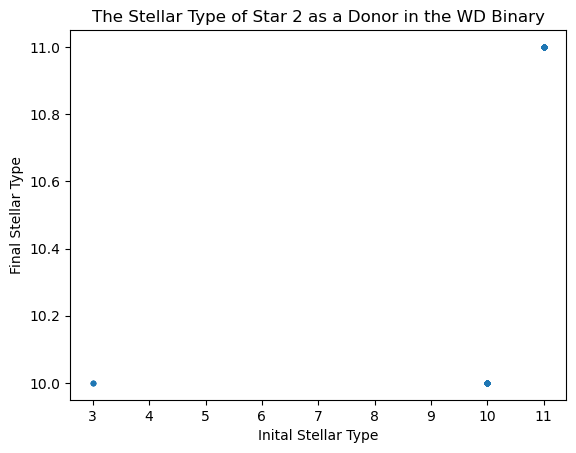

In [143]:
# let's look at the properties of these binaries
# let's plot the inital and final stellar type of the donar
plt.plot(RLOF_DOUBLE_WD_SYS_2['Stellar_Type(1)<MT'],RLOF_DOUBLE_WD_SYS_2['Stellar_Type(1)>MT'],'.')
plt.xlabel("Inital Stellar Type")
plt.ylabel("Final Stellar Type")
plt.title("The Stellar Type of Star 2 as a Donor in the WD Binary")

Text(0.5, 1.0, 'The Separation Distribution of Star 2 as a Donor in the WD Binary')

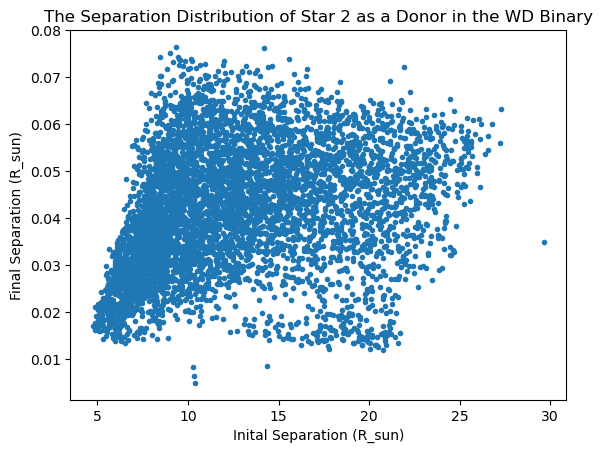

In [144]:
# let's look at the separation before and after mass transfer of these systems
plt.plot(RLOF_DOUBLE_WD_SYS_2['SemiMajorAxis<MT'],RLOF_DOUBLE_WD_SYS_2['SemiMajorAxis>MT'],'.')
plt.xlabel("Inital Separation (R_sun)")
plt.ylabel("Final Separation (R_sun)")
plt.title("The Separation Distribution of Star 2 as a Donor in the WD Binary")

#### Let's do a check to see if the Merger flag is being properly marked

In [145]:
RLOF_WD_SYS

,Beta,CEE>MT,Eccentricity<MT,Eccentricity>MT,Luminosity(1),Luminosity(2),MT_Event_Counter,Mass(1)<MT,Mass(1)>MT,Mass(2)<MT,Mass(2)>MT,MassTransferRateDonor,Merger,Metallicity@ZAMS(1),RLOF(1)<MT,RLOF(1)>MT,RLOF(2)<MT,RLOF(2)>MT,Radius(1)<MT,Radius(1)>MT,Radius(1)|RL<step,Radius(1)|RL>step,Radius(2)<MT,Radius(2)>MT,Radius(2)|RL<step,Radius(2)|RL>step,Record_Type,SEED,SemiMajorAxis<MT,SemiMajorAxis>MT,Stellar_Type(1)<MT,Stellar_Type(1)>MT,Stellar_Type(2)<MT,Stellar_Type(2)>MT,Teff(1),Teff(2),Time<MT,Time>MT,Zeta_Hurley(1),Zeta_Hurley(2),Zeta_Hurley_He(1),Zeta_Hurley_He(2),Zeta_Soberman(1),Zeta_Soberman(2),Zeta_Soberman_He(1),Zeta_Soberman_He(2)
1,1.800453e-04,1,0.0,0.0,67.416305,2.450749,1,1.373332,0.484894,1.046741,1.046741,4080.076594,0,0.000908,0,1,0,0,87.658313,0.014465,1.014591,0.004797,0.985190,0.985190,0.012909,0.230083,1,900008,214.580624,9.583364,3,10,1,1,137662.170109,7283.534659,2136.546394,2136.582588,0.000000,-0.217282,0.000000,-0.217282,0.000000,-0.333333,0.000000,-0.333333
2,1.000000e+00,1,0.0,0.0,0.000032,28.778335,2,0.484894,0.484894,1.045742,0.206989,1.603274,1,0.000908,0,0,0,1,0.014465,0.014465,0.004793,0.780111,4.334885,0.021111,1.011909,1.677673,1,900008,9.589619,0.040833,10,10,3,10,3615.552810,92106.861333,5413.907596,5418.296910,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
4,3.483055e-01,0,0.0,0.0,67.495194,1.739594,1,1.229807,0.146792,0.815584,1.192804,0.275219,0,0.018059,0,1,0,0,2.365612,0.024025,1.004568,0.001623,0.768827,1.141591,0.393822,0.030155,1,900010,5.675490,67.422690,2,10,1,1,106848.256225,6210.610207,5126.906504,5140.120180,0.000000,-0.300660,0.000000,-0.300660,0.000000,-0.333333,0.000000,-0.333333
6,6.278652e-03,0,0.0,0.0,104.922638,3.102078,1,4.695694,0.786718,1.119037,1.143581,118.601151,0,0.000285,0,1,0,0,10.540471,0.169311,1.000421,0.221492,0.925444,0.939400,0.168120,1.035970,1,900011,20.839634,2.202671,2,7,1,1,44941.999462,7911.619139,100.227725,100.257539,-0.166656,-0.166656,0.000000,-0.166656,-0.333333,-0.333333,0.000000,-0.333333
7,1.000000e+00,0,0.0,0.0,203.200166,1.638895,2,0.786718,0.942451,1.143581,0.987848,0.081287,0,0.000285,1,0,0,1,0.172891,0.197628,0.226176,0.256415,0.939765,0.839961,1.036373,1.066642,1,900011,2.202671,2.056089,7,7,1,1,49072.056136,7133.220848,100.257539,102.173377,-0.166656,-0.166656,0.000000,-0.166656,-0.333333,-0.333333,0.000000,-0.333333
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1100573,1.721074e-05,0,0.0,0.0,0.000017,1.664785,15,0.596435,0.596435,1.062687,1.055828,0.000077,0,0.021814,0,0,1,1,0.012827,0.012827,0.014236,0.014298,1.243129,1.250260,1.060111,1.073958,1,824978,2.728837,2.712736,11,11,1,1,3292.530369,5869.714764,4019.439746,4108.909909,0.000000,-0.307228,1.692747,-0.307228,0.000000,-0.333333,274859.040373,-0.333333
1100574,2.643862e-11,0,0.0,0.0,0.000017,1.157720,16,0.596435,0.596435,1.055828,0.851291,0.061850,0,0.021814,0,0,1,1,0.012827,0.012827,0.014298,0.015346,1.242514,1.345565,1.067305,1.368473,1,824978,2.712736,2.397843,11,11,1,2,3265.888114,5166.852073,4108.909909,4200.587195,0.000000,-0.307188,1.692747,-0.307188,0.000000,-0.149258,274858.012930,-0.149258
1100579,2.294918e-01,0,0.0,0.0,7.858648,39.785575,1,2.943731,0.418613,1.674482,2.253976,13.653379,0,0.001776,0,1,0,0,4.438340,0.088697,1.034590,0.005675,1.181782,1.298654,0.356346,0.038879,1,824987,10.010856,63.370978,2,7,1,1,32483.258598,12733.921227,310.300125,310.416048,-0.243644,-0.243644,0.000000,-0.243644,-0.333333,-0.333333,0.000000,-0.333333
1100584,5.754504e-01,0,0.0,0.0,21.473683,5.360572,1,1.924002,1.568897,1.185687,1.390033,1.600967,0,0.004428,0,1,0,0,2.720246,2.348647,1.005816,1.033748,1.173404,1.250025,0.541144,0.581479,1,824996,6.417657,5.833902,1,2,1,1,8116.061747,7863.591167,931.593913,941.831096,-0.269155,-0.269240,-0.269155,-0.269240,-0.121381,-0.333333,-0.121381,-0.333333


In [98]:
# let's take the columns of interest - radius after MT and stellar merger and compare them

radius_1 = np.array(RLOF_WD_SYS["Radius(1)>MT"])
radius_2 = np.array(RLOF_WD_SYS["Radius(2)>MT"])
separation = np.array(RLOF_WD_SYS["SemiMajorAxis>MT"])

stell_merge = []

# Let's add R1 and R2 and flag if this sum is greater than or equal to the final separation 

# looping through each binary
for stars in range(RLOF_WD_SYS.shape[0]):

#adding together the final radius of each star
    tot_rad = radius_1[stars] + radius_2[stars]

# only marking a stellar merger if the seum of the radii exceeds the separation distance 
    if (tot_rad >= separation[stars]):

        stell_merge.append(1)

# otherwise not flagging a merger
    else:
        stell_merge.append(0)


In [99]:
stell_merge = np.array(stell_merge)

In [100]:
# let's compare the merge flag and this new array I made
merge_compas = RLOF_WD_SYS["Merger"]

In [101]:
# let's see if there are any places wehre these lists are both true 

len(np.where(stell_merge!=merge_compas)[0]) # there are 3733 spots where my analysis for a stellar merger does not match of COMPAS'

3733

In [102]:
# RLOF_WD_SYS

In [103]:
# let's add my check as a column in the data to slice the data a little easier

# only run this cell once per table creation
RLOF_WD_SYS.insert(12,"Stellar Merger Check",stell_merge,True)

In [104]:
# in case you need to remove the column
# RLOF_WD_SYS = RLOF_WD_SYS.drop('Stellar Merger Check', axis=1)

In [105]:
RLOF_WD_SYS

,Beta,CEE>MT,Eccentricity<MT,Eccentricity>MT,Luminosity(1),Luminosity(2),MT_Event_Counter,Mass(1)<MT,Mass(1)>MT,Mass(2)<MT,Mass(2)>MT,MassTransferRateDonor,Stellar Merger Check,Merger,Metallicity@ZAMS(1),RLOF(1)<MT,RLOF(1)>MT,RLOF(2)<MT,RLOF(2)>MT,Radius(1)<MT,Radius(1)>MT,Radius(1)|RL<step,Radius(1)|RL>step,Radius(2)<MT,Radius(2)>MT,Radius(2)|RL<step,Radius(2)|RL>step,Record_Type,SEED,SemiMajorAxis<MT,SemiMajorAxis>MT,Stellar_Type(1)<MT,Stellar_Type(1)>MT,Stellar_Type(2)<MT,Stellar_Type(2)>MT,Teff(1),Teff(2),Time<MT,Time>MT,Zeta_Hurley(1),Zeta_Hurley(2),Zeta_Hurley_He(1),Zeta_Hurley_He(2),Zeta_Soberman(1),Zeta_Soberman(2),Zeta_Soberman_He(1),Zeta_Soberman_He(2)
1,1.800453e-04,1,0.0,0.0,67.416305,2.450749,1,1.373332,0.484894,1.046741,1.046741,4080.076594,0,0,0.000908,0,1,0,0,87.658313,0.014465,1.014591,0.004797,0.985190,0.985190,0.012909,0.230083,1,900008,214.580624,9.583364,3,10,1,1,137662.170109,7283.534659,2136.546394,2136.582588,0.000000,-0.217282,0.000000,-0.217282,0.000000,-0.333333,0.000000,-0.333333
2,1.000000e+00,1,0.0,0.0,0.000032,28.778335,2,0.484894,0.484894,1.045742,0.206989,1.603274,0,1,0.000908,0,0,0,1,0.014465,0.014465,0.004793,0.780111,4.334885,0.021111,1.011909,1.677673,1,900008,9.589619,0.040833,10,10,3,10,3615.552810,92106.861333,5413.907596,5418.296910,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
4,3.483055e-01,0,0.0,0.0,67.495194,1.739594,1,1.229807,0.146792,0.815584,1.192804,0.275219,0,0,0.018059,0,1,0,0,2.365612,0.024025,1.004568,0.001623,0.768827,1.141591,0.393822,0.030155,1,900010,5.675490,67.422690,2,10,1,1,106848.256225,6210.610207,5126.906504,5140.120180,0.000000,-0.300660,0.000000,-0.300660,0.000000,-0.333333,0.000000,-0.333333
6,6.278652e-03,0,0.0,0.0,104.922638,3.102078,1,4.695694,0.786718,1.119037,1.143581,118.601151,0,0,0.000285,0,1,0,0,10.540471,0.169311,1.000421,0.221492,0.925444,0.939400,0.168120,1.035970,1,900011,20.839634,2.202671,2,7,1,1,44941.999462,7911.619139,100.227725,100.257539,-0.166656,-0.166656,0.000000,-0.166656,-0.333333,-0.333333,0.000000,-0.333333
7,1.000000e+00,0,0.0,0.0,203.200166,1.638895,2,0.786718,0.942451,1.143581,0.987848,0.081287,0,0,0.000285,1,0,0,1,0.172891,0.197628,0.226176,0.256415,0.939765,0.839961,1.036373,1.066642,1,900011,2.202671,2.056089,7,7,1,1,49072.056136,7133.220848,100.257539,102.173377,-0.166656,-0.166656,0.000000,-0.166656,-0.333333,-0.333333,0.000000,-0.333333
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1100573,1.721074e-05,0,0.0,0.0,0.000017,1.664785,15,0.596435,0.596435,1.062687,1.055828,0.000077,0,0,0.021814,0,0,1,1,0.012827,0.012827,0.014236,0.014298,1.243129,1.250260,1.060111,1.073958,1,824978,2.728837,2.712736,11,11,1,1,3292.530369,5869.714764,4019.439746,4108.909909,0.000000,-0.307228,1.692747,-0.307228,0.000000,-0.333333,274859.040373,-0.333333
1100574,2.643862e-11,0,0.0,0.0,0.000017,1.157720,16,0.596435,0.596435,1.055828,0.851291,0.061850,0,0,0.021814,0,0,1,1,0.012827,0.012827,0.014298,0.015346,1.242514,1.345565,1.067305,1.368473,1,824978,2.712736,2.397843,11,11,1,2,3265.888114,5166.852073,4108.909909,4200.587195,0.000000,-0.307188,1.692747,-0.307188,0.000000,-0.149258,274858.012930,-0.149258
1100579,2.294918e-01,0,0.0,0.0,7.858648,39.785575,1,2.943731,0.418613,1.674482,2.253976,13.653379,0,0,0.001776,0,1,0,0,4.438340,0.088697,1.034590,0.005675,1.181782,1.298654,0.356346,0.038879,1,824987,10.010856,63.370978,2,7,1,1,32483.258598,12733.921227,310.300125,310.416048,-0.243644,-0.243644,0.000000,-0.243644,-0.333333,-0.333333,0.000000,-0.333333
1100584,5.754504e-01,0,0.0,0.0,21.473683,5.360572,1,1.924002,1.568897,1.185687,1.390033,1.600967,0,0,0.004428,0,1,0,0,2.720246,2.348647,1.005816,1.033748,1.173404,1.250025,0.541144,0.581479,1,824996,6.417657,5.833902,1,2,1,1,8116.061747,7863.591167,931.593913,941.831096,-0.269155,-0.269240,-0.269155,-0.269240,-0.121381,-0.333333,-0.1

In [106]:
(RLOF_WD_SYS.loc[RLOF_WD_SYS['Merger']!=RLOF_WD_SYS['Stellar Merger Check']]).shape[0]

3733

In [107]:
# let's look at where these checks do not match
RLOF_BAD_CHECK = RLOF_WD_SYS.loc[RLOF_WD_SYS['Merger']!=RLOF_WD_SYS['Stellar Merger Check']]

In [108]:
# SELECTING THE WD BINARIES
WD_1_BOOL = np.logical_or(RLOF_WD_SYS['Stellar_Type(1)>MT']==12, np.logical_or(RLOF_WD_SYS['Stellar_Type(1)>MT']==10,RLOF_WD_SYS['Stellar_Type(1)>MT']==11))
WD_2_BOOL = np.logical_or(RLOF_WD_SYS['Stellar_Type(2)>MT']==12, np.logical_or(RLOF_WD_SYS['Stellar_Type(2)>MT']==10,RLOF_WD_SYS['Stellar_Type(2)>MT']==11))

In [109]:
# let's slice the dataframe to just look at the WD binaries that cause that alsohave "bad checks" for stellar mergers
RLOF_BAD_CHECK = RLOF_BAD_CHECK[WD_1_BOOL]
RLOF_BAD_CHECK = RLOF_BAD_CHECK[WD_2_BOOL]
RLOF_BAD_CHECK.shape[0] 

/tmp/ipykernel_1205207/3105540557.py:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  RLOF_BAD_CHECK = RLOF_BAD_CHECK[WD_1_BOOL]
/tmp/ipykernel_1205207/3105540557.py:3: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  RLOF_BAD_CHECK = RLOF_BAD_CHECK[WD_2_BOOL]


3733

In [110]:
RLOF_BAD_CHECK

,Beta,CEE>MT,Eccentricity<MT,Eccentricity>MT,Luminosity(1),Luminosity(2),MT_Event_Counter,Mass(1)<MT,Mass(1)>MT,Mass(2)<MT,Mass(2)>MT,MassTransferRateDonor,Stellar Merger Check,Merger,Metallicity@ZAMS(1),RLOF(1)<MT,RLOF(1)>MT,RLOF(2)<MT,RLOF(2)>MT,Radius(1)<MT,Radius(1)>MT,Radius(1)|RL<step,Radius(1)|RL>step,Radius(2)<MT,Radius(2)>MT,Radius(2)|RL<step,Radius(2)|RL>step,Record_Type,SEED,SemiMajorAxis<MT,SemiMajorAxis>MT,Stellar_Type(1)<MT,Stellar_Type(1)>MT,Stellar_Type(2)<MT,Stellar_Type(2)>MT,Teff(1),Teff(2),Time<MT,Time>MT,Zeta_Hurley(1),Zeta_Hurley(2),Zeta_Hurley_He(1),Zeta_Hurley_He(2),Zeta_Soberman(1),Zeta_Soberman(2),Zeta_Soberman_He(1),Zeta_Soberman_He(2)
2,1.000000e+00,1,0.0,0.0,0.000032,28.778335,2,0.484894,0.484894,1.045742,0.206989,1.603274,0,1,0.000908,0,0,0,1,0.014465,0.014465,0.004793,0.780111,4.334885,0.021111,1.011909,1.677673,1,900008,9.589619,0.040833,10,10,3,10,3615.552810,92106.861333,5413.907596,5418.296910,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
492,6.387882e-17,1,0.0,0.0,0.000002,16.596023,2,0.383217,0.383217,1.257757,0.288121,17.825649,0,1,0.000100,0,0,0,1,0.016277,0.016277,0.002620,0.870589,10.729478,0.018476,1.006969,1.125700,1,900370,22.014258,0.046297,11,11,3,10,1761.795349,85798.185581,2965.388852,2966.269036,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
913,4.372903e-16,1,0.0,0.0,0.000001,34.328717,2,0.333659,0.333659,0.927260,0.231785,5.570571,0,1,0.001063,0,0,0,1,0.017340,0.017340,0.004211,0.780386,6.630574,0.020194,1.011552,1.073334,1,900815,13.967889,0.054087,11,11,3,10,1406.065070,98418.992519,8514.184173,8516.624453,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
941,6.480481e-15,1,0.0,0.0,0.000021,80.016694,2,0.644647,0.644647,1.413031,0.225918,4.670194,0,1,0.009405,0,0,0,1,0.012190,0.012190,0.002398,0.633839,7.361258,0.020400,1.012834,1.708541,1,900868,16.217178,0.040778,11,11,3,10,3527.412518,120991.305116,3022.856708,3024.069078,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1069,3.506562e-16,1,0.0,0.0,0.000001,61.510550,2,0.347630,0.347630,0.925864,0.229782,6.587762,0,1,0.004670,0,0,0,1,0.017025,0.017025,0.003977,0.728065,6.754524,0.020264,1.010492,1.046903,1,901026,14.359527,0.056317,11,11,3,10,1518.159245,113672.084969,10884.757926,10886.844962,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1099530,1.000000e+00,1,0.0,0.0,0.000004,14.134529,2,0.463104,0.463104,0.888768,0.213426,1.666719,0,1,0.000142,0,0,0,1,0.014821,0.014821,0.004892,0.587301,4.093568,0.020861,1.003724,1.176542,1,823948,9.346986,0.056423,10,10,3,10,2172.337337,77567.818256,9228.935347,9233.772639,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1099584,2.502020e-15,1,0.0,0.0,0.000017,62.119924,3,0.740197,0.740197,1.331040,0.250530,10.310963,0,1,0.003857,0,0,0,1,0.011011,0.011011,0.001572,0.359951,9.284519,0.019574,1.014329,1.046946,1,824025,21.260136,0.064438,11,11,3,10,3547.280345,115943.322922,3065.591494,3066.537607,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1099590,1.000000e+00,1,0.0,0.0,0.000008,33.993747,2,0.428885,0.428885,0.833330,0.189602,1.142606,0,1,0.001715,0,0,0,1,0.015413,0.015413,0.005500,0.688500,3.824870,0.021835,1.008210,1.414645,1,824027,8.672737,0.049640,10,10,3,10,2465.107237,94417.553997,13027.271055,13033.517739,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1099862,1.000000e+00,1,0.0,0.0,0.000004,45.531964,2,0.215318,0.215318,0.866530,0.258882,21.299632,0,1,0.001634,0,0,0,1,0.020789,0.020789,0.003430,1.055805,11.516474,0.019315,1.011254,0.901731,1,824362,22.689040,0.054231,10,10,3,10,1749.987815,107997.529304,11828.146249,11829.471107,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


It seems that all of the stellar mergers that had bad checks were also systems that were WD bianries in their final states

(0.0, 3000.0)

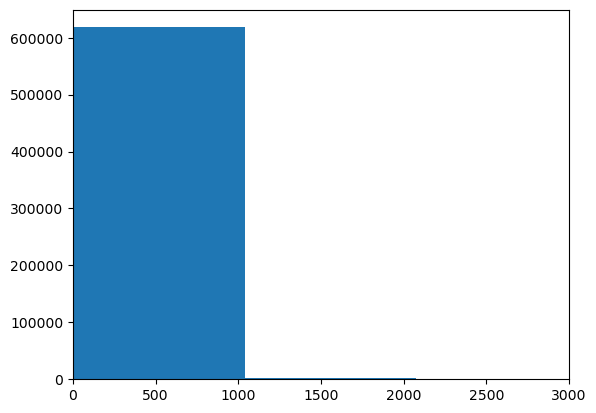

In [115]:
# Let's compare the final separation from system params vs the final system parameters seen in RLOF

plt.hist(RLOF_WD_SYS['SemiMajorAxis>MT']);
plt.xlim(0,3000)

(0.0, 3000.0)

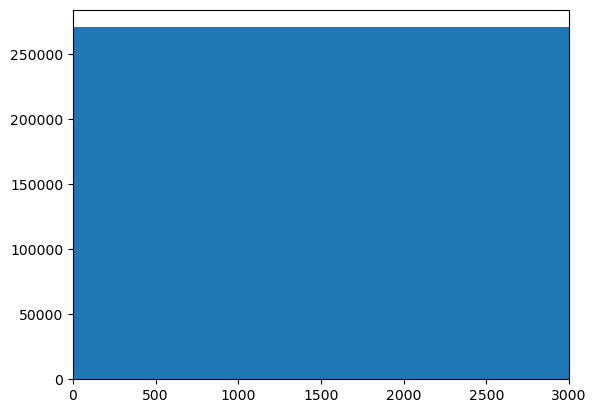

In [116]:
plt.hist(DOUBLE_WD_SYS['SemiMajorAxis']);
plt.xlim(0,3000)

Random cells below

In [81]:
# what useful information is there in each key
# CE_list = list(Data_2['BSE_Common_Envelopes'].keys())
# DCO_list = list(Data_2['BSE_Double_Compact_Objects'].keys())
# PE_list = list(Data_2['BSE_Pulsar_Evolution'].keys())
# RLOF_list = list(Data_2['BSE_RLOF'].keys())
# SN_list = list(Data_2['BSE_Supernovae'].keys())
# SP_list = list(Data_2['BSE_System_Parameters'].keys())

In [82]:
# keys_info = {'BSE_Common_Envelopes': pd.Series(CE_list),'BSE_Double_Compact_Objects':pd.Series(DCO_list),'BSE_Pulsar_Evolution':pd.Series(PE_list),'BSE_RLOF':pd.Series(RLOF_list),'BSE_Supernovae':pd.Series(SN_list),'BSE_System_Parameters':pd.Series(SP_list)}
# df = pd.DataFrame(keys_info)
# pd.set_option('display.max_rows', None)
# display(df)

In [41]:
# df.to_csv('Low_Mass_COMPAS_keys_info.txt', index=False)

In [88]:
# # we want to read in the bse_system_paramtetrs to get information about thes different systems
# SDCO = pd.DataFrame() # making a pandas dataframe

# for key in Data_2["BSE_Double_Compact_Objects"].keys(): #looping through the "keys" or paramters in BSE_System_Parameters

#     SDCO[key] = Data_2["BSE_Double_Compact_Objects"][key][()] # adding these columns to the dataframe

In [33]:
# SDCO

In [ ]:
# WE EVENTUALLY WANT TO FLAG IF THE BINARIES MERGE TO FORM A SUPERNOVAE WITH:
# t_Hubble = 13.7 *u.Gyr
# merger_tHubble = (coalescence_time < t_Hubble)

In [34]:
# # we want to read in the bse_system_paramtetrs to get information about thes different systems
# SPs_SYS = pd.DataFrame() # making a pandas dataframe

# for key in Data_2["BSE_Double_Compact_Objects"].keys(): #looping through the "keys" or paramters in BSE_System_Parameters

#     SPs_SYS[key] = Data_2["BSE_Double_Compact_Objects"][key][()] # adding these columns to the dataframe

In [35]:
# SPs_SYS